# Ames Iowa Housing Price Prediction

#### by Ian Stack

## Problem Statement: 


I was hired by the Iowa Housing company to asses the Ames Iowa housing dataset in order to find out which attributes of a home are most important when buying and selling a home to make profit. This process, commonly known as flipping houses, can be a lucrative investment strategy but it also carries a certain level of risk. In order to successfully flip houses, I will analyze the Ames Iowa housing dataset and determine which qualities of the homes attribute to a higher sale price.

I will use linear, ridge, and LASSO regression models to predict the sale price for properitees in Ames Iowa. The measurment I will use to predict the sale prices will be the root mean squared error(RMSE) from the regression problems

Imports:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics

%matplotlib inline

from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, Ridge
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer



Load Data set

In [2]:
file_path_1 = 'datasets/train.csv'
file_path_2 = 'datasets/test.csv'

train_df = pd.read_csv(file_path_1)
test_df = pd.read_csv(file_path_2)

In [3]:
pd.options.display.max_columns = 99

train_df.head(2)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000


In [4]:
test_df.head(1)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD


In [5]:
#Make columns lower case and get rid of spaces
train_df.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

## Review and Clean Data

In [6]:
train_df.shape

(2051, 81)

In [7]:
test_df.shape

(878, 80)

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

The above infromation shows that there are 5 columns/features that have have a high amount of null values.
They are:

    1. Alley, 140 non-null
    2. Fireplace Qu, 1051 non-null
    3. Pool QC, 9 non-null
    4. Fence, 400 non-null
    5. Misc Feature, 65 non-null

For my project I will not be including these columns becasue:
    
    1. An Alley does not seem to have a strong corrletaion in the sale price of a home.  Futhermore, there are only 
    140 out of the 2051 entries are non-null (140/2051 ≈ 0.068, approx. 6.8% are null)
    
    2. I will drop Fireplace Qu column as there is another column labeled: Fireplaces that has 2051 non-null entries
    
    3. I will drop Pool QC column as there is another column labeled Pool Area that has 2051 non-null entries
    
    4. I dropped Fence as there are only 400 non-null entries out of the total 2051. There are approximately 19.5%
       null entries in Fence (400/2051), therefore it would be difficult to work with this little amount of null entries.
       
    5.I dropped Fence as there are only 65 non-null entries out of the total 2051. There are approximately 3.2%
       null entries in Fence (65/2051), therefore it would be difficult to work with this little amount of null entries.

In [9]:
# Dropping the 5 noted columns above

train_df = train_df.drop(columns = ['Alley', 'Fireplace Qu', 'Pool QC', 'Fence', 'Misc Feature'])


In [10]:
#Check and make sure they are dropped

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 76 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Lot Shape        2051 non-null   object 
 8   Land Contour     2051 non-null   object 
 9   Utilities        2051 non-null   object 
 10  Lot Config       2051 non-null   object 
 11  Land Slope       2051 non-null   object 
 12  Neighborhood     2051 non-null   object 
 13  Condition 1      2051 non-null   object 
 14  Condition 2      2051 non-null   object 
 15  Bldg Type        2051 non-null   object 
 16  House Style      2051 non-null   object 
 17  Overall Qual  

In [11]:
# Other columns with null values include:

train_df.isnull().sum().sort_values(ascending=False).head(21)

Lot Frontage      330
Garage Yr Blt     114
Garage Finish     114
Garage Qual       114
Garage Cond       114
Garage Type       113
Bsmt Exposure      58
BsmtFin Type 2     56
Bsmt Cond          55
Bsmt Qual          55
BsmtFin Type 1     55
Mas Vnr Area       22
Mas Vnr Type       22
Bsmt Half Bath      2
Bsmt Full Bath      2
BsmtFin SF 1        1
BsmtFin SF 2        1
Bsmt Unf SF         1
Garage Area         1
Garage Cars         1
Total Bsmt SF       1
dtype: int64

In [12]:
#Removing index since Id was the previous index
train_df.set_index("Id", inplace = True)

The code above shows the rest of the columns with null features that I will Review

#### Reviewing Total Bsmt SF null values

In [13]:
train_df[train_df['Total Bsmt SF'].isnull()]
#looking at this there is only 1 row with null values and they are the Bsmt feature that have null values


,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1342,903230120,20,RM,99.0,5940,Pave,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,0,4,2008,ConLD,79000


In [14]:
train_df[train_df['Total Bsmt SF'].isnull()][['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1','BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath','Bsmt Half Bath']]

,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath
Id,,,,,,,,,,,
1342,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Since this is the only row with null values, I am going to assume that this housing property does NOT have a basement (0 sq. ft), therefore I will turn all the Bsmt SF to 0.  Also the basement full and half bathroom are null values, and since the other data in these 2 columns are numerical, I will turn these 2 null values to 0 as well. I am not turning the other null values to 0 as they represent categorical data

In [15]:
train_df['Total Bsmt SF'] = train_df['Total Bsmt SF'].fillna(0)
train_df['BsmtFin SF 1'] = train_df['BsmtFin SF 1'].fillna(0)
train_df['BsmtFin SF 2'] = train_df['BsmtFin SF 2'].fillna(0)
train_df['Bsmt Unf SF'] = train_df['Bsmt Unf SF'].fillna(0)
train_df['Bsmt Full Bath'] = train_df['Bsmt Full Bath'].fillna(0)
train_df['Bsmt Half Bath'] = train_df['Bsmt Half Bath'].fillna(0)

I will now change the the other numerical null values noted in Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFinType 1,
BsmtFinType 2 to none

In [16]:
train_df['Bsmt Qual'] = train_df['Bsmt Qual'].fillna('None')
train_df['Bsmt Cond'] = train_df['Bsmt Cond'].fillna('None')
train_df['Bsmt Exposure'] = train_df['Bsmt Exposure'].fillna('None')
train_df['BsmtFin Type 1'] = train_df['BsmtFin Type 1'].fillna('None')
train_df['BsmtFin Type 2'] = train_df['BsmtFin Type 2'].fillna('None')

#### Reviewing Garage Cars null values

In [17]:
train_df[train_df['Garage Cars'].isnull()]

#Based off this, I am assuming that null values for ['Garage Cars'] means the housing property has 0 garge cars, 
#therefore I wil change the null's to 0

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2237,910201180,70,RM,50.0,9060,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,BrkTil,Gd,TA,No,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,0,Detchd,NaN,NaN,NaN,NaN,NaN,NaN,Y,174,0,212,0,0,0,0,3,2007,WD,150909


In [18]:
train_df['Garage Cars'] = train_df['Garage Cars'].fillna(0)

Reviewing Garage Area with null values

In [19]:
train_df[train_df['Garage Area'].isnull()]


,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2237,910201180,70,RM,50.0,9060,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,BrkTil,Gd,TA,No,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,0,Detchd,NaN,NaN,0.0,NaN,NaN,NaN,Y,174,0,212,0,0,0,0,3,2007,WD,150909


Garage cars has 1 null value.  Even though Garage Type states: Detchd,  I am going to assume that this housing
property does not have a garage since the rest of the garage features state: NaN
    
I will change this null value to 0

In [20]:
train_df['Garage Area'] = train_df['Garage Area'].fillna(0)

#### Reviewing Mas Vnr Area null values

In [21]:
train_df[train_df['Mas Vnr Area'].isnull()].head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2393,528142010,60,RL,103.0,12867,Pave,IR1,Lvl,AllPub,Corner,Gtl,NridgHt,Norm,Norm,1Fam,2Story,8,5,2005,2006,Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Ex,TA,Av,Unf,0.0,Unf,0.0,1209.0,1209.0,GasA,Ex,Y,SBrkr,1209,1044,0,2253,0.0,0.0,2,1,3,1,Ex,8,Typ,1,Attchd,2005.0,Fin,2.0,575.0,TA,TA,Y,243,142,0,0,0,0,0,7,2006,New,344133
2383,528110050,20,RL,107.0,13891,Pave,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Ex,TA,PConc,Ex,Gd,Gd,GLQ,1386.0,Unf,0.0,690.0,2076.0,GasA,Ex,Y,SBrkr,2076,0,0,2076,1.0,0.0,2,1,2,1,Ex,7,Typ,1,Attchd,2006.0,Fin,3.0,850.0,TA,TA,Y,216,229,0,0,0,0,0,9,2006,New,465000
539,531371050,20,RL,67.0,10083,Pave,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,833.0,Unf,0.0,343.0,1176.0,GasA,Ex,Y,SBrkr,1200,0,0,1200,1.0,0.0,2,0,2,1,Gd,5,Typ,0,Attchd,2003.0,RFn,2.0,555.0,TA,TA,Y,0,41,0,0,0,0,0,8,2009,WD,184900
518,528458020,20,FV,90.0,7993,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2008,2009,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Ex,TA,No,Unf,0.0,Unf,0.0,1436.0,1436.0,GasA,Ex,Y,SBrkr,1436,0,0,1436,0.0,0.0,2,0,3,1,Gd,6,Typ,0,Attchd,2008.0,Fin,2.0,529.0,TA,TA,Y,0,121,0,0,0,0,0,10,2009,New,225000
2824,908130020,20,RL,75.0,8050,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,6,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,TA,TA,PConc,Gd,TA,Av,GLQ,475.0,ALQ,297.0,142.0,914.0,GasA,Ex,Y,SBrkr,914,0,0,914,1.0,0.0,1,0,2,1,Gd,4,Typ,0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,32,0,0,0,0,0,0,4,2006,WD,117250


Since other entries under 'Mas Vnr Area' have numerical values that represent the Masonry veneer area in square feet,
I am going to assume that the null values equate to 0 sq ft.

In [22]:
train_df['Mas Vnr Area'] = train_df['Mas Vnr Area'].fillna(0)

Reviewing 'Mas Vnr Type' null values

In [23]:
train_df[train_df['Mas Vnr Type'].isnull()].head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2393,528142010,60,RL,103.0,12867,Pave,IR1,Lvl,AllPub,Corner,Gtl,NridgHt,Norm,Norm,1Fam,2Story,8,5,2005,2006,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Gd,TA,PConc,Ex,TA,Av,Unf,0.0,Unf,0.0,1209.0,1209.0,GasA,Ex,Y,SBrkr,1209,1044,0,2253,0.0,0.0,2,1,3,1,Ex,8,Typ,1,Attchd,2005.0,Fin,2.0,575.0,TA,TA,Y,243,142,0,0,0,0,0,7,2006,New,344133
2383,528110050,20,RL,107.0,13891,Pave,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,Ex,TA,PConc,Ex,Gd,Gd,GLQ,1386.0,Unf,0.0,690.0,2076.0,GasA,Ex,Y,SBrkr,2076,0,0,2076,1.0,0.0,2,1,2,1,Ex,7,Typ,1,Attchd,2006.0,Fin,3.0,850.0,TA,TA,Y,216,229,0,0,0,0,0,9,2006,New,465000
539,531371050,20,RL,67.0,10083,Pave,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,833.0,Unf,0.0,343.0,1176.0,GasA,Ex,Y,SBrkr,1200,0,0,1200,1.0,0.0,2,0,2,1,Gd,5,Typ,0,Attchd,2003.0,RFn,2.0,555.0,TA,TA,Y,0,41,0,0,0,0,0,8,2009,WD,184900
518,528458020,20,FV,90.0,7993,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2008,2009,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,Gd,TA,PConc,Ex,TA,No,Unf,0.0,Unf,0.0,1436.0,1436.0,GasA,Ex,Y,SBrkr,1436,0,0,1436,0.0,0.0,2,0,3,1,Gd,6,Typ,0,Attchd,2008.0,Fin,2.0,529.0,TA,TA,Y,0,121,0,0,0,0,0,10,2009,New,225000
2824,908130020,20,RL,75.0,8050,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,6,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,475.0,ALQ,297.0,142.0,914.0,GasA,Ex,Y,SBrkr,914,0,0,914,1.0,0.0,1,0,2,1,Gd,4,Typ,0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,32,0,0,0,0,0,0,4,2006,WD,117250


Since other entries under 'Mas Vnr Type' have categorical values, I am going to assume that that these null values state
the housing property does not have a masonry veneer type.  I will change the null values to 'None'

In [24]:
train_df['Mas Vnr Type'] = train_df['Mas Vnr Type'].fillna('None')

In [25]:
train_df[train_df["Garage Yr Blt"].isnull()]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2243,911103060,190,C (all),75.0,8250,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Feedr,Norm,2fmCon,2Story,5,6,1895,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,957.0,957.0,GasA,Fa,N,SBrkr,1034,957,0,1991,0.0,0.0,2,0,4,2,TA,9,Typ,0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,133,0,0,0,0,6,2007,WD,119600
330,923226250,160,RM,21.0,1476,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,GLQ,176.0,Unf,0.0,370.0,546.0,GasA,Ex,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,200,26,0,0,0,0,0,3,2010,WD,76000
2278,923202134,20,RL,70.0,8402,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Feedr,Norm,1Fam,1Story,5,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,ALQ,206.0,Unf,0.0,914.0,1120.0,GasA,Ex,Y,SBrkr,1120,0,0,1120,0.0,0.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,30,0,0,0,0,0,12,2007,New,147000
2235,910201050,50,RM,50.0,7288,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Artery,Norm,1Fam,1.5Fin,5,7,1925,2003,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,Gd,BrkTil,TA,Po,No,Unf,0.0,Unf,0.0,936.0,936.0,GasA,Ex,Y,SBrkr,936,665,0,1601,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,0,176,0,0,0,9,2007,WD,129850
2084,905476170,30,RL,58.0,9098,Pave,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,4,7,1920,2002,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,Mn,ALQ,348.0,Unf,0.0,180.0,528.0,GasA,Ex,Y,SBrkr,605,0,0,605,1.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,144,0,0,0,0,7,2007,WD,86000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,923204150,90,RL,94.0,9400,Pave,Reg,Low,AllPub,Corner,Gtl,Mitchel,Norm,Norm,Duplex,2Story,6,5,1971,1971,Mansard,CompShg,MetalSd,Wd Shng,None,0.0,TA,TA,CBlock,TA,TA,Av,Unf,0.0,Unf,0.0,912.0,912.0,GasA,TA,Y,SBrkr,912,912,0,1824,0.0,0.0,2,2,4,2,TA,8,Typ,0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,128,0,0,0,0,0,0,4,2010,WD,139000
2880,911175410,30,C (all),69.0,12366,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Feedr,Norm,1Fam,1Story,3,5,1945,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,Slab,None,None,None,None,0.0,None,0.0,0.0,0.0,GasA,TA,N,SBrkr,729,0,0,729,0.0,0.0,1,0,2,1,TA,5,Mod,0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,23,0,0,0,0,10,2006,WD,51689
2628,535456010,90,RL,75.0,8512,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,Duplex,1Story,5,5,1960,1960,Hip,CompShg,BrkFace,BrkFace,None,0.0,TA,TA,CBlock,TA,Fa,No,Unf,0.0,Unf,0.0,1556.0,1556.0,GasA,TA,Y,SBrkr,1556,0,0,1556,0.0,0.0,2,0,4,2,TA,8,Typ,0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,0,9,2006,WD,119000


In [26]:
train_df[train_df['Garage Yr Blt'].isnull()][['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']]


,Garage Type,Garage Finish,Garage Qual,Garage Cond
Id,,,,
2243,NaN,NaN,NaN,NaN
330,NaN,NaN,NaN,NaN
2278,NaN,NaN,NaN,NaN
2235,NaN,NaN,NaN,NaN
2084,NaN,NaN,NaN,NaN
...,...,...,...,...
325,NaN,NaN,NaN,NaN
2880,NaN,NaN,NaN,NaN
2628,NaN,NaN,NaN,NaN


Based off this data I am going to assume that all the garage columns with null values are properties
that do not have a garge.  

Therefore I will change the categorical value columns ([Garage Type], [Garage Finish],
[Garage Qual], and [Garage Cond]) to 'None'.  

For null values in [Garage Yr Blt], I will equate the [Year Built] column
values to the null values in [Garage Yr Blt]

In [27]:
train_df['Garage Type'] = train_df['Garage Type'].fillna('None')
train_df['Garage Finish'] = train_df['Garage Finish'].fillna('None')
train_df['Garage Qual'] = train_df['Garage Qual'].fillna('None')
train_df['Garage Cond'] = train_df['Garage Cond'].fillna('None')


In [28]:
train_df['Garage Yr Blt'] = train_df['Garage Yr Blt'].fillna(train_df['Year Built'])

In [29]:
train_df.isnull().sum().sort_values(ascending=False).head(21)

Lot Frontage       330
PID                  0
Bsmt Half Bath       0
Functional           0
TotRms AbvGrd        0
Kitchen Qual         0
Kitchen AbvGr        0
Bedroom AbvGr        0
Half Bath            0
Full Bath            0
Bsmt Full Bath       0
Garage Type          0
Gr Liv Area          0
Low Qual Fin SF      0
2nd Flr SF           0
1st Flr SF           0
Electrical           0
Central Air          0
Fireplaces           0
Garage Yr Blt        0
Heating              0
dtype: int64

Reviewing ['Lot Frontage'] null value

In [30]:
train_df[train_df['Lot Frontage'].isnull()].head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
109,533352170,60,RL,NaN,13517,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,0,3,2010,WD,130500
145,535154050,20,RL,NaN,12160,Pave,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1959,1959,Hip,CompShg,Plywood,Plywood,BrkFace,180.0,TA,TA,CBlock,TA,TA,No,Rec,1000.0,Unf,0.0,188.0,1188.0,GasA,Fa,Y,SBrkr,1188,0,0,1188,1.0,0.0,1,0,3,1,TA,6,Typ,0,Attchd,1959.0,RFn,2.0,531.0,TA,TA,Y,0,0,0,0,0,0,0,5,2010,COD,142000
1942,535353130,20,RL,NaN,15783,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1Story,5,5,1952,1952,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,292.0,Unf,0.0,632.0,924.0,GasA,TA,Y,SBrkr,924,0,0,924,0.0,0.0,1,0,2,1,TA,6,Typ,0,Detchd,1952.0,Unf,1.0,420.0,TA,TA,Y,0,324,0,0,0,0,400,6,2007,WD,112500
12,527165230,20,RL,NaN,7980,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,6,7,1992,2007,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,Gd,PConc,Gd,TA,No,ALQ,935.0,Unf,0.0,233.0,1168.0,GasA,Ex,Y,SBrkr,1187,0,0,1187,1.0,0.0,2,0,3,1,TA,6,Typ,0,Attchd,1992.0,Fin,2.0,420.0,TA,TA,Y,483,21,0,0,0,0,500,3,2010,WD,185000
1534,909277040,50,RL,NaN,11700,Pave,IR1,HLS,AllPub,Inside,Mod,Crawfor,Norm,Norm,1Fam,1.5Fin,5,6,1937,1995,Gable,CompShg,WdShing,Wd Shng,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,606.0,Unf,0.0,336.0,942.0,GasA,Ex,Y,SBrkr,1265,673,0,1938,0.0,0.0,2,0,4,1,Gd,7,Min2,1,Detchd,1937.0,Unf,1.0,240.0,TA,TA,Y,0,40,0,0,0,0,0,7,2008,WD,198000


Based off other entries in ['Lot Frontage'], I am going to assume that the null values represent properties
that do not have Lot Frontage (Linear feet of street connected to property). It seems unlikely that a home would not have a street connection.  Therefore, I will grouby by neighborhood and use the median 'Lot Frontage' to place for those entries with null values

In [31]:
train_df['Lot Frontage'] = train_df.groupby('Neighborhood')['Lot Frontage'].apply(lambda var: var.fillna(var.median()))


In [32]:
train_df.isnull().sum().sort_values(ascending=False).head()

Lot Frontage      3
PID               0
Bsmt Half Bath    0
Functional        0
TotRms AbvGrd     0
dtype: int64

For the rest of the null values I will equate the mean LotFrontage of all values for these 3 null values

In [33]:
train_df['Lot Frontage'] = train_df['Lot Frontage'].fillna(train_df['Lot Frontage'].mean())

In [34]:
train_df.isnull().sum().sort_values(ascending=False).head()

PID              0
Garage Type      0
Functional       0
TotRms AbvGrd    0
Kitchen Qual     0
dtype: int64

All Null values are fixed!

### Outliers

Text(0, 0.5, 'Sale Price')

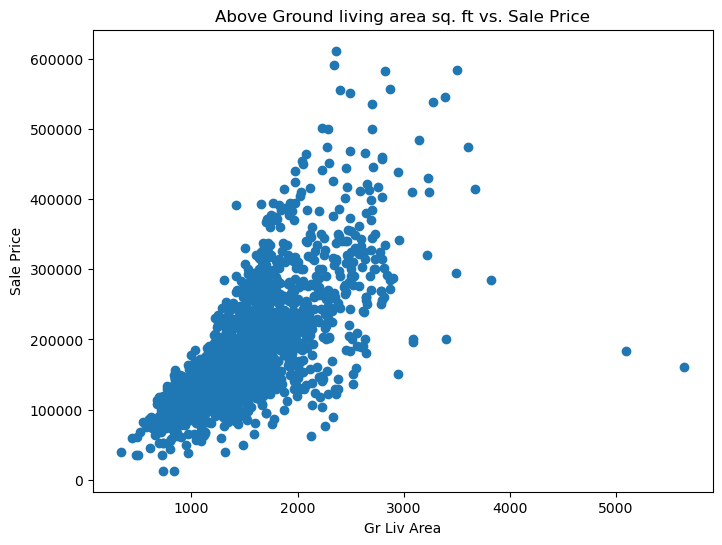

In [35]:
# Scatter plot of 'Gr Liv Area, (Above grade ground living area square ft) and ' SalePrice'
plt.figure(figsize= (8,6))
plt.scatter(train_df['Gr Liv Area'],
            train_df['SalePrice']);

plt.title('Above Ground living area sq. ft vs. Sale Price')
plt.xlabel('Gr Liv Area')
plt.ylabel('Sale Price')

Two Observations are noted in this scatterplot that are lying seperate from the rest.  These are
outliers that I will delete from the training set.

In [36]:
train_df['Gr Liv Area'].max()

#Removing first outlier

train_df = train_df[train_df['Gr Liv Area'] != 5642]

In [37]:
train_df['Gr Liv Area'].max()

#Removing second outlier

train_df = train_df[train_df['Gr Liv Area'] != 5095]


Text(0, 0.5, 'Sale Price')

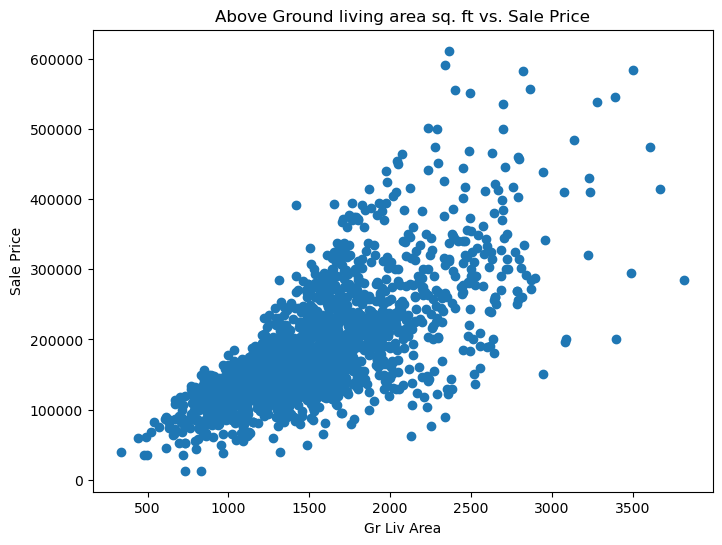

In [38]:
#Check and make sure outliers removed
plt.figure(figsize= (8,6))
plt.scatter(train_df['Gr Liv Area'],
            train_df['SalePrice']);

plt.title('Above Ground living area sq. ft vs. Sale Price')
plt.xlabel('Gr Liv Area')
plt.ylabel('Sale Price')

Text(0, 0.5, 'Sale Price')

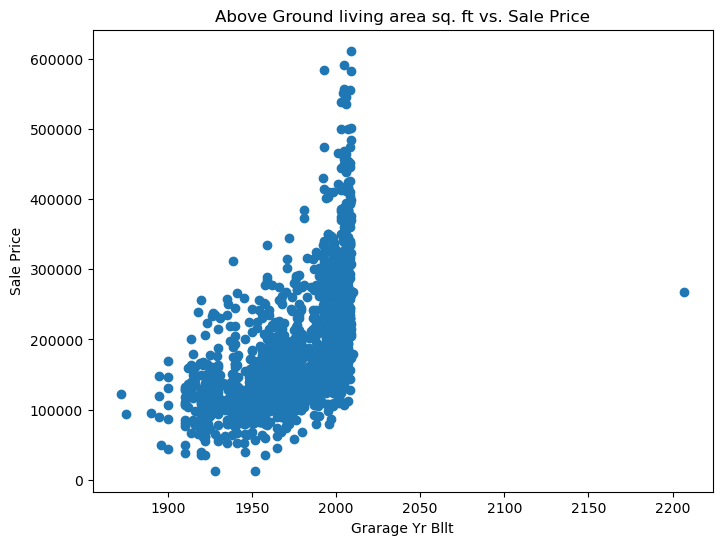

In [39]:
#Checking for outliers in ['Garage Yr Blt'] and ['SalePrice']
plt.figure(figsize= (8,6))
plt.scatter(train_df['Garage Yr Blt'],
            train_df['SalePrice']);

plt.title('Above Ground living area sq. ft vs. Sale Price')
plt.xlabel('Grarage Yr Bllt')
plt.ylabel('Sale Price')


Based off the scatter plot, there is one outlier that I will remove from the dataset.

In [40]:
train_df['Garage Yr Blt'].max()

#Removing first outlier

train_df = train_df[train_df['Garage Yr Blt'] != 2207]

Text(0, 0.5, 'Sale Price')

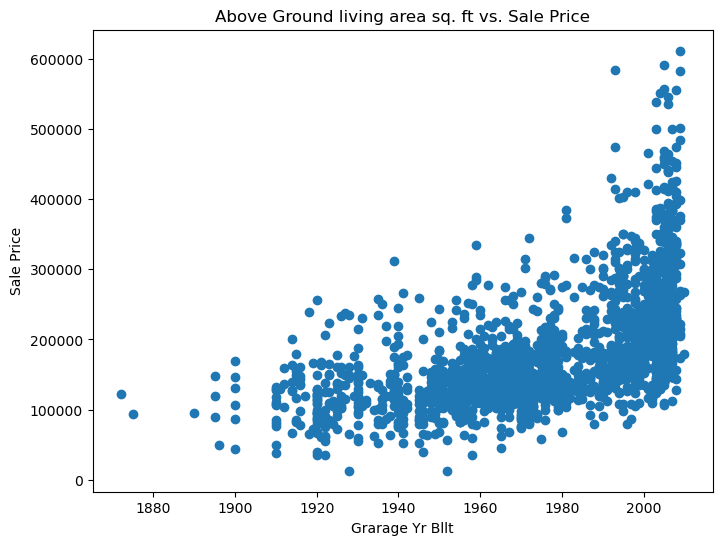

In [41]:
#Check and see if outlier removed
plt.figure(figsize= (8,6))
plt.scatter(train_df['Garage Yr Blt'],
            train_df['SalePrice']);

plt.title('Above Ground living area sq. ft vs. Sale Price')
plt.xlabel('Grarage Yr Bllt')
plt.ylabel('Sale Price')

## Exploratory Data Analysis

Nominal/Non-Categorical Features:

In [42]:
train_df.corr()['SalePrice'].sort_values(ascending=False)

SalePrice          1.000000
Overall Qual       0.803336
Gr Liv Area        0.719598
Total Bsmt SF      0.664912
Garage Area        0.655215
Garage Cars        0.648271
1st Flr SF         0.648054
Year Built         0.572148
Garage Yr Blt      0.556405
Year Remod/Add     0.550614
Full Bath          0.538050
Mas Vnr Area       0.511760
TotRms AbvGrd      0.510078
Fireplaces         0.473625
BsmtFin SF 1       0.446068
Lot Frontage       0.351722
Open Porch SF      0.339064
Wood Deck SF       0.327571
Lot Area           0.303974
Bsmt Full Bath     0.284993
Half Bath          0.283882
2nd Flr SF         0.249342
Bsmt Unf SF        0.190504
Bedroom AbvGr      0.137759
Screen Porch       0.134749
3Ssn Porch         0.048789
Mo Sold            0.031990
Pool Area          0.025844
BsmtFin SF 2       0.016557
Misc Val          -0.010273
Yr Sold           -0.014867
Low Qual Fin SF   -0.041563
Bsmt Half Bath    -0.045415
MS SubClass       -0.086915
Overall Cond      -0.096857
Kitchen AbvGr     -0

Based off this correlation I plan to look at these first 5 features:

Overall Qual
Gr Liv Area
Garage Area
Garage Cars
Total Bsmt SF 

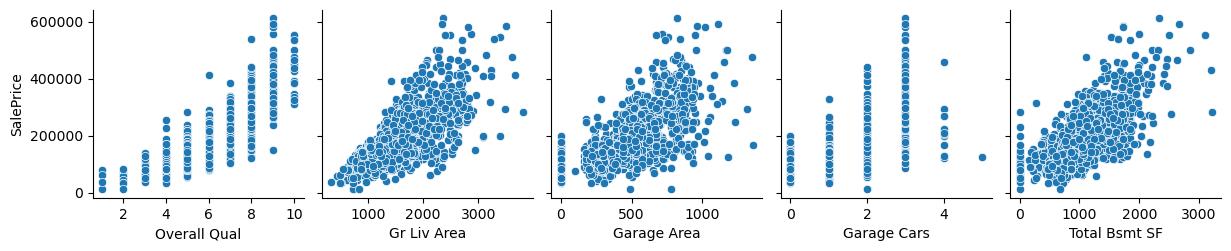

In [43]:
# Pairplot of top 5 non-categorical features to ['SalePrice']

sns.pairplot(data = train_df,
            y_vars = ['SalePrice'],
            x_vars = ['Overall Qual', 'Gr Liv Area', 'Garage Area',
                      'Garage Cars', 'Total Bsmt SF'],
             diag_kind = None)

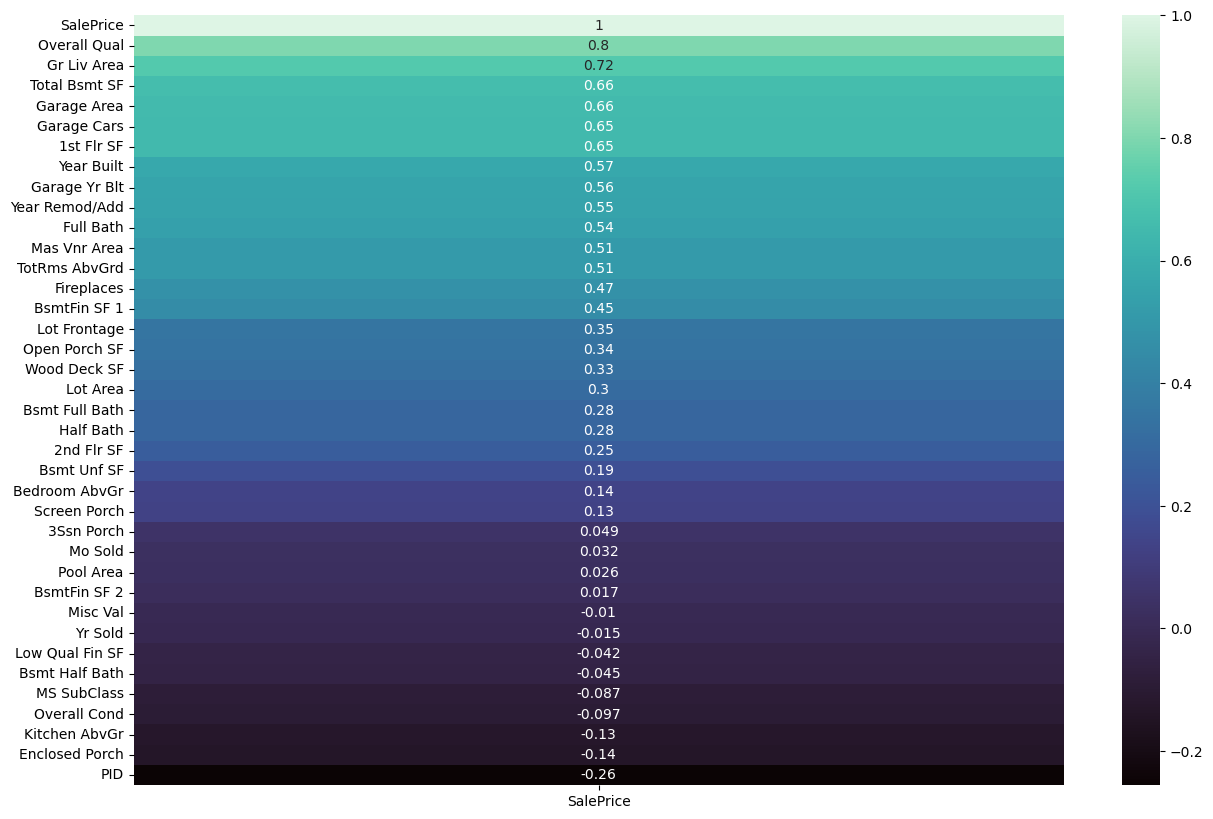

In [44]:
#Heatmap to see correlation of 'SalePrice' with other non-categorical features

# Establish size of figure.
plt.figure(figsize=(15, 10))

# Get correlation of variables.
corr = train_df.corr()

# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Plot our correlation heatmap, while masking the upper triangle to be white.
sns.heatmap(train_df.corr()[['SalePrice']].sort_values(by='SalePrice', ascending = False),          
            annot=True,
            cmap='mako');

I will be starting my model with the top 5 correlated features with SalePrice:
    
    - Overall Qual: 0.803
    - Gr Live Area: 0.700
    - Total Bsmt SF: 0.665
    - Garage Area: 0.648
    - Garage Cars: 0.648

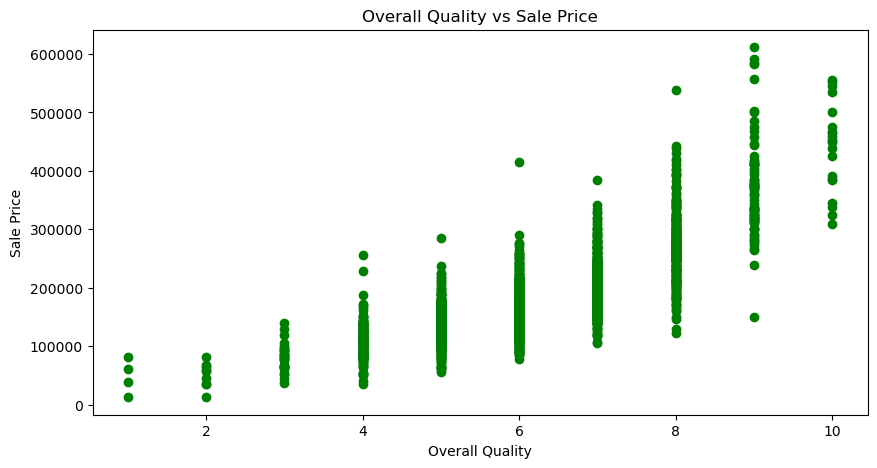

In [45]:
#1. Overall Qual vs. SalePrice

# Size
plt.figure(figsize=(10, 5))

# Scatter plot
plt.scatter(x=train_df['Overall Qual'],
            y=train_df['SalePrice'],
            c='g') # color='green'

# Create a descriptive title
plt.title('Overall Quality vs Sale Price')

# Add axis labels
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price');

Looks like there is a general positive relationship between overall quality and sale price.
There seems to be a few outliers but nothing significant

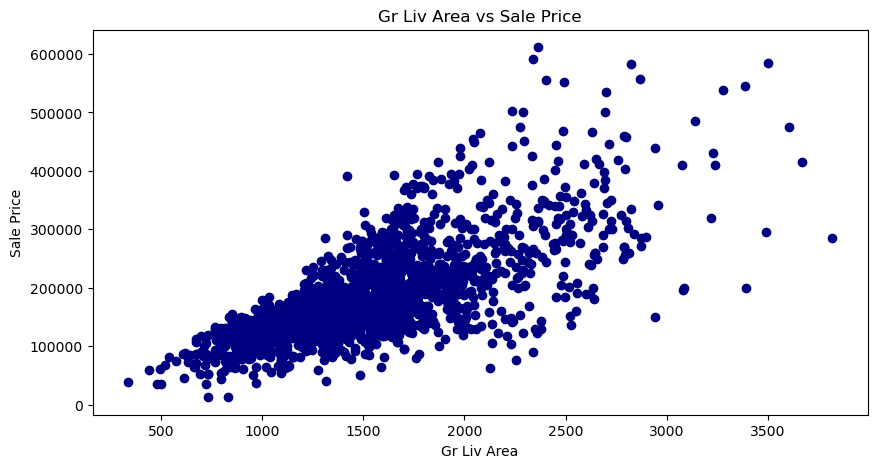

In [46]:
#2. Gr Liv Area (Above grade (ground) living area square feet) vs. SalePrice

# Size
plt.figure(figsize=(10, 5))

# Scatter plot
plt.scatter(x=train_df['Gr Liv Area'],
            y=train_df['SalePrice'],
            c='navy') 

# Create a descriptive title
plt.title('Gr Liv Area vs Sale Price')

# Add axis labels
plt.xlabel('Gr Liv Area')
plt.ylabel('Sale Price');

Looks like there is a general positive relationship between Gr Liv Area (Above grade (ground) living area square feet) and sale price. There seems to be a few outliers but nothing significant

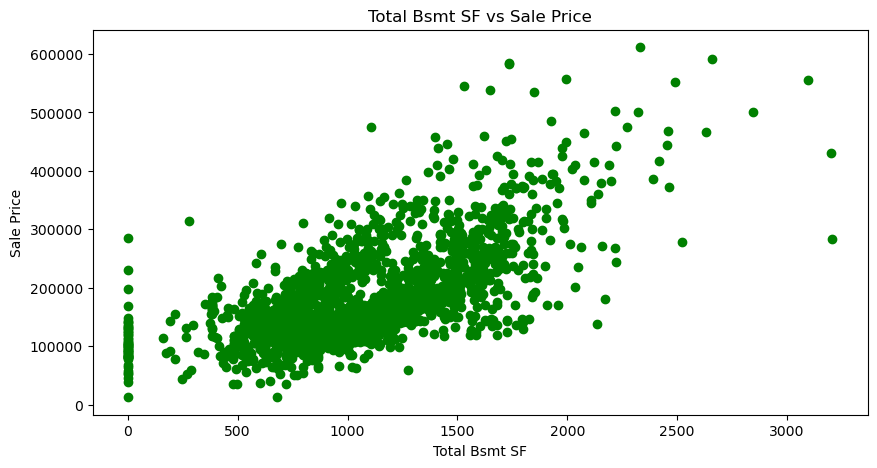

In [47]:
#3. Total Bsmt SF (Total Basement Square footage) vs. SalePrice

# Size
plt.figure(figsize=(10, 5))

# Scatter plot
plt.scatter(x=train_df['Total Bsmt SF'],
            y=train_df['SalePrice'],
            color = 'g') 

# Create a descriptive title
plt.title('Total Bsmt SF vs Sale Price')

# Add axis labels
plt.xlabel('Total Bsmt SF')
plt.ylabel('Sale Price');

Looks like there is a cluster around 0 in Total Bsmt SF while Sale Price is still increasing.
Furthere more, there seems to be a few outliers.  There is a general positive relationship 
between these two variables.

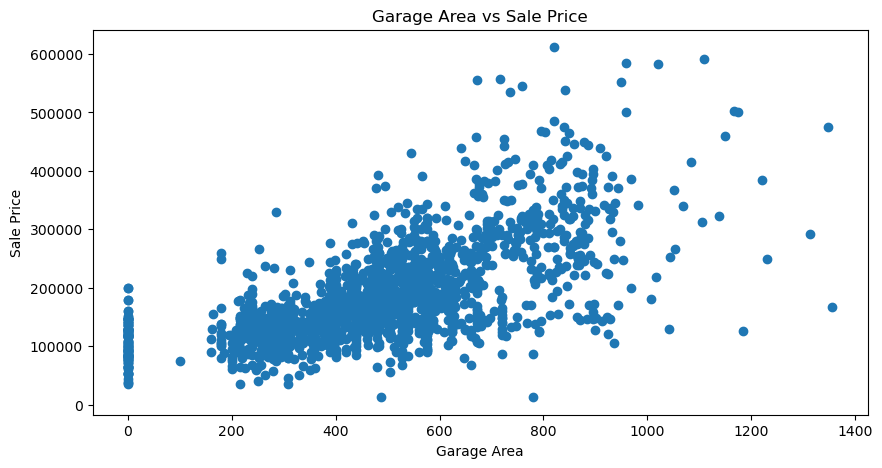

In [48]:
#4. Garage Area vs. SalePrice

# Size
plt.figure(figsize=(10, 5))

# Scatter plot
plt.scatter(x=train_df['Garage Area'],
            y=train_df['SalePrice'],
            ) 

# Create a descriptive title
plt.title('Garage Area vs Sale Price')

# Add axis labels
plt.xlabel('Garage Area')
plt.ylabel('Sale Price');

Looks like there is a cluster around 0 in Garage Area while Sale Price is still increasing.
Furthere more, there seems to be a few outliers. 
There is a general positive relationship between these two variables.

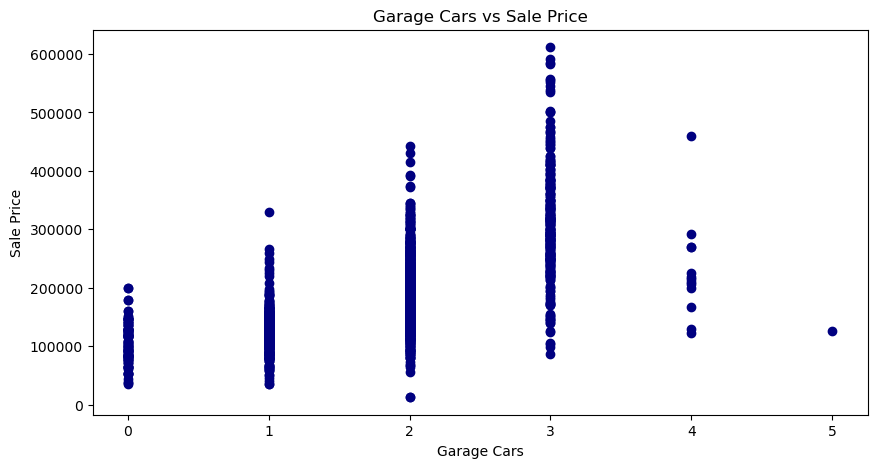

In [49]:
#5. Garage Cars vs. SalePrice

# Size
plt.figure(figsize=(10, 5))

# Scatter plot
plt.scatter(x=train_df['Garage Cars'],
            y=train_df['SalePrice'],
            color = 'navy') 

# Create a descriptive title
plt.title('Garage Cars vs Sale Price')

# Add axis labels
plt.xlabel('Garage Cars')
plt.ylabel('Sale Price');

Looks like there is 1 potential outlier, but this graph shows that having 3 cars could be the
most optimal for highest Sale Price.

Categorical Features

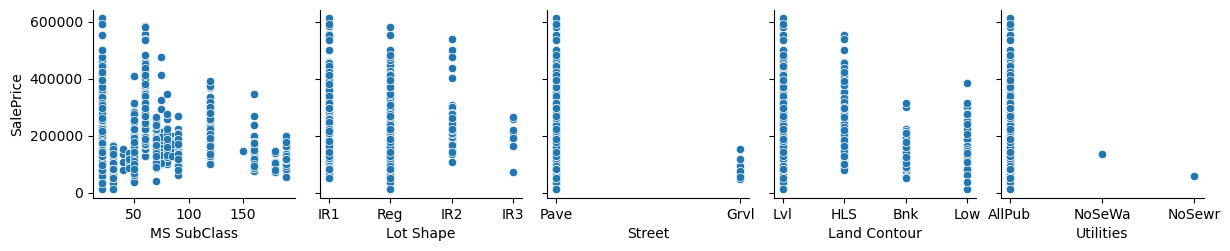

In [50]:
# Looking at pairplot graphs between Categorical Features and SalePrice
sns.pairplot(data = train_df,
            y_vars = ['SalePrice'],
            x_vars = ['MS SubClass', 'Lot Shape', 'Street',
                      'Land Contour', 'Utilities'],
             diag_kind = None)

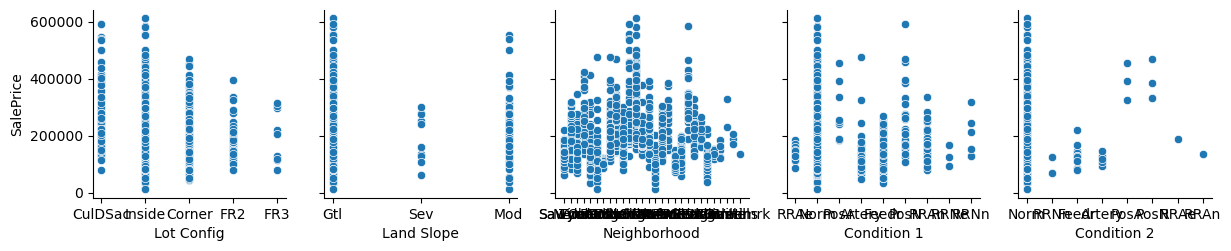

In [51]:
sns.pairplot(data = train_df,
            y_vars = ['SalePrice'],
            x_vars = ['Lot Config', 'Land Slope', 'Neighborhood',
                      'Condition 1', 'Condition 2'],
             diag_kind = None)

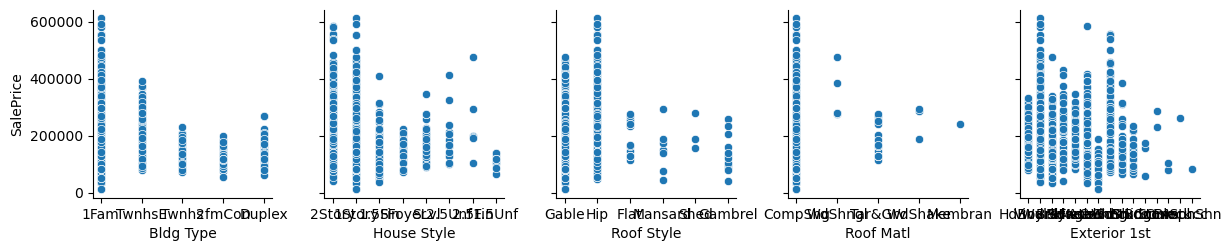

In [52]:
sns.pairplot(data = train_df,
            y_vars = ['SalePrice'],
            x_vars = ['Bldg Type', 'House Style', 'Roof Style',
                      'Roof Matl', 'Exterior 1st'],
             diag_kind = None)

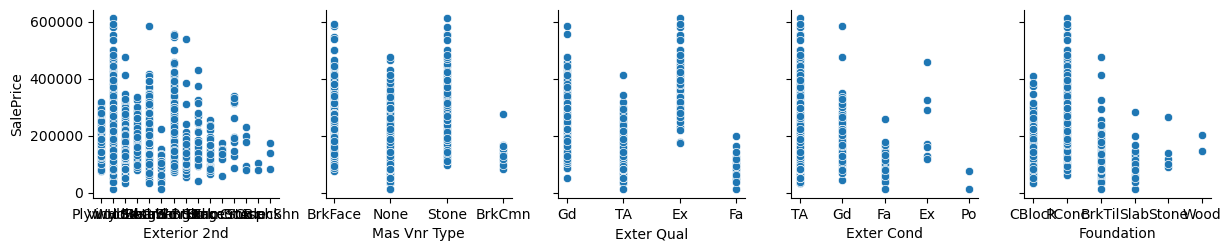

In [53]:
sns.pairplot(data = train_df,
            y_vars = ['SalePrice'],
            x_vars = ['Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
                      'Exter Cond', 'Foundation'],
             diag_kind = None)

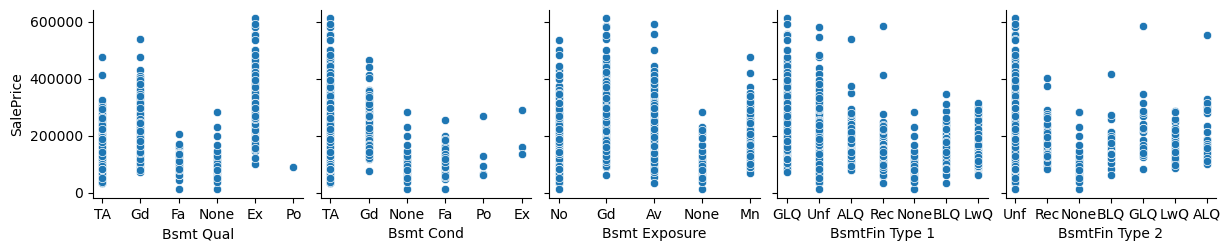

In [54]:
sns.pairplot(data = train_df,
            y_vars = ['SalePrice'],
            x_vars = ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
                      'BsmtFin Type 1', 'BsmtFin Type 2'],
             diag_kind = None)

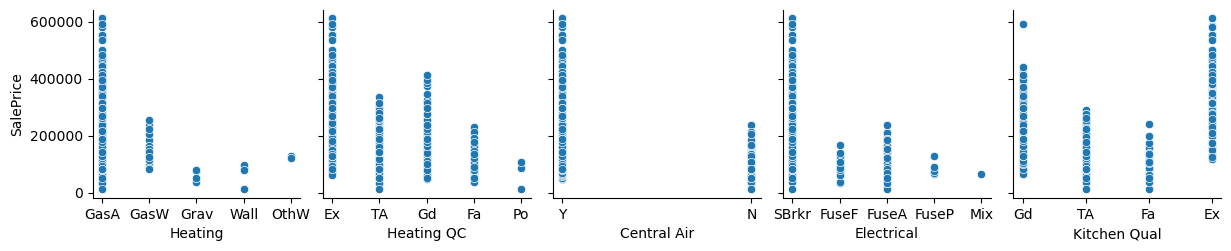

In [55]:
sns.pairplot(data = train_df,
            y_vars = ['SalePrice'],
            x_vars = ['Heating', 'Heating QC', 'Central Air',
                      'Electrical', 'Kitchen Qual'],
             diag_kind = None)

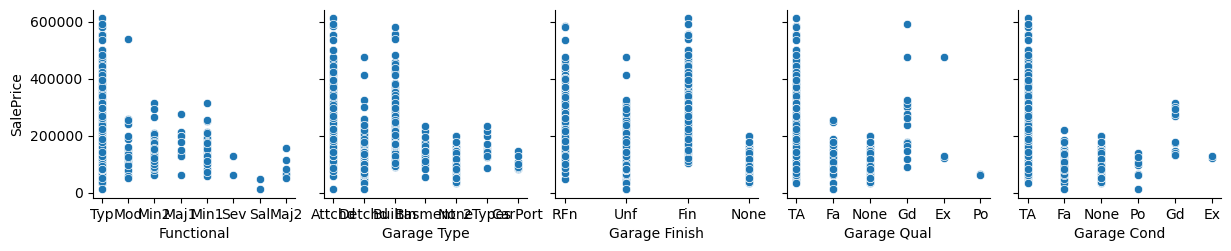

In [56]:
sns.pairplot(data = train_df,
            y_vars = ['SalePrice'],
            x_vars = ['Functional', 'Garage Type', 'Garage Finish',
                      'Garage Qual', 'Garage Cond'],
             diag_kind = None)

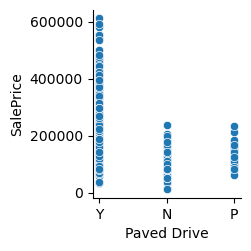

In [57]:
sns.pairplot(data = train_df,
            y_vars = ['SalePrice'],
            x_vars = ['Paved Drive'],
             diag_kind = None)

After looking at the categorical data and how it correlates with SalePrice,  some columns
that I will look more into include: Neighborhood

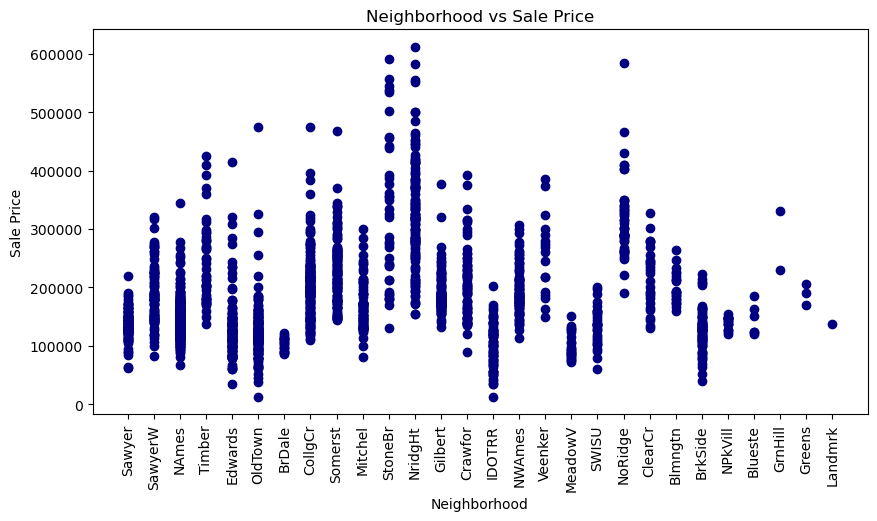

In [58]:
#Neighborhood vs. SalePrice

# Size
plt.figure(figsize=(10, 5))

# Scatter plot
plt.scatter(x=train_df['Neighborhood'],
            y=train_df['SalePrice'],
            color = 'navy') 

# Create a descriptive title
plt.title('Neighborhood vs Sale Price')

# Add axis labels
plt.xticks(rotation = '90')
plt.xlabel('Neighborhood')
plt.ylabel('Sale Price');

Based off this graph, it looks certain neighborhoods such as StoneBr, NridhHt, and NoRidge
seem to have properties with higher SalePrice.  

Futhermore, one of the entries under the Neighborhood "Landmrk" does seem to fit in the data

In [59]:
#Removal of Landmark since there is only 1 entry in the dataset with this neigborhood

#identify the entry
#train_df[train_df['Neighborhood'] == 'Landmrk']

#Remove it
train_df = train_df[train_df['Neighborhood'] != 'Landmrk']

## Preprocessing and Modeling

I plan to fit a Linear Regression Model to:

    1. the 5 highest correlated nominal features 1st.
    2. Then add categorical features

In [60]:
train_df._get_numeric_data().columns

Index(['PID', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'SalePrice'],
      dtype='object')

#### Linear Regression with these variables

In [65]:
#Defining Variables
#1.
# I am using the top 5 nominal correlated features with SalePrice 

X = train_df[['Overall Qual', 'Gr Liv Area', 'Garage Area',
                      'Garage Cars', 'Total Bsmt SF']]
y = train_df['SalePrice']

In [68]:
#A linear regression function 

# #https://edvancer.in/step-step-guide-to-execute-linear-regression-python/
# #https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
# #The above sources helped me generate a defined function that I could use elsewhere to find the Linear Regression
def get_linear_regression(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=42)
    lr = LinearRegression()
    lr_fit_train_test = lr.fit(X_train, y_train)
    
    #Baseline Score
    lr_fit = lr.fit(X, y)
    lr_score = lr.score(X, y)
    cross_val_xy = cross_val_score(lr, X, y)
    rmse_lr = mean_squared_error(y_true=y, y_pred=lr.predict(X), squared=False)
    
    #Train-Test Split
    cross_val = cross_val_score(lr, X_train, y_train)
    r2_train = lr.score(X_train, y_train)
    r2_test = lr.score(X_test, y_test)
    
    rmse_train = mean_squared_error(y_true=y_train, y_pred=lr.predict(X_train), squared=False)
    rmse_test = mean_squared_error(y_true=y_test, y_pred=lr.predict(X_test), squared=False)
    
    # Prediction and Residuals
    lr_preds = lr.predict(X_test)
    lr_residuals = lr_preds - y_test
   
    # Residuals Plot
    plt.scatter(lr_residuals.index, lr_residuals)
    plt.title("Residuals", fontsize = 15)
    plt.ylabel("Actual Values", fontsize = 15)
    plt.xlabel("Predicted Values", fontsize = 15)
    
    print(f'Linear Regression R^2: {lr_score}')
    print(f'Linear Regression Cross Validation: {cross_val_xy}')
    print(f'Root Mean Squared Error: {rmse_lr}')
    print('')
    print(f'Linear Regression Train Cross Validation: {cross_val}')
    print(f'Linear Regression Train R^2: {r2_train}')
    print(f'Linear Regression Test R^2: {r2_test}')
    print(f'Root Mean Squared Error Train: {rmse_train}')
    print(f'Root Mean Squared Error Test: {rmse_test}')

Linear Regression R^2: 0.8152049299524177
Linear Regression Cross Validation: [0.80297169 0.82356048 0.82011759 0.82612279 0.80027266]
Root Mean Squared Error: 34083.518560345416

Linear Regression Train Cross Validation: [0.80766328 0.78690238 0.81992055 0.79987058 0.78499778]
Linear Regression Train R^2: 0.8105319612530455
Linear Regression Test R^2: 0.8163349591177915
Root Mean Squared Error Train: 34078.616776660725
Root Mean Squared Error Test: 34084.742400011084


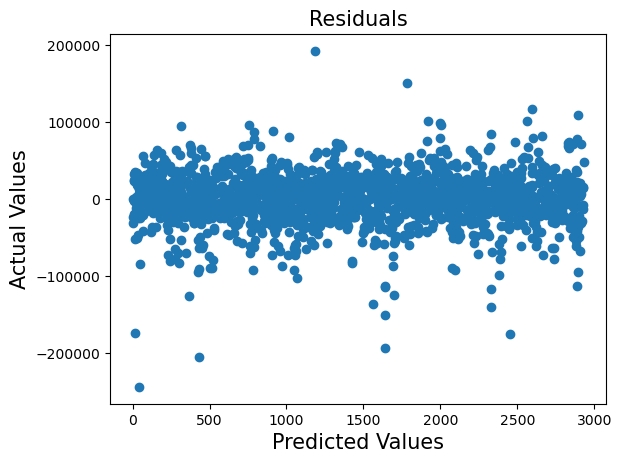

In [69]:
get_linear_regression(X,y)

Intially my R^2 value = 0.815 with a RMSE = 34083.52

In my train_test_split model:

    a. The train data produced an R^2 value = 0.81 with a RMSE = 34078.62
    b. The test data produced an R^2 value = 0.82 with a RMSE = 34084.74
    

Since my test RMSE is higher than my intial RMSE, this indicates that my model is not 
a great fit for the data. 

### Adding the "Neighborhood" categorical feature

In [70]:

X = train_df[['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Total Bsmt SF', 'Garage Cars', 'Neighborhood']]

# One-hot encoding 'Neighborhood'
X = pd.get_dummies(columns=['Neighborhood'], drop_first=True, data=X)
X.head()

,Overall Qual,Gr Liv Area,Garage Area,Total Bsmt SF,Garage Cars,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
109,6,1479,475.0,725.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
544,7,2122,559.0,913.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
153,5,1057,246.0,1057.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
318,5,1444,400.0,384.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
255,6,1445,484.0,676.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


Linear Regression R^2: 0.8497941951996909
Linear Regression Cross Validation: [0.83334974 0.86429447 0.85115015 0.84281543 0.83375266]
Root Mean Squared Error: 30728.58696513264

Linear Regression Train Cross Validation: [0.85175022 0.83029034 0.84877105 0.85069023 0.82572125]
Linear Regression Train R^2: 0.8672271212225483
Linear Regression Test R^2: 0.8455755992297344
Root Mean Squared Error Train: 28527.82520569859
Root Mean Squared Error Test: 31253.93672624788


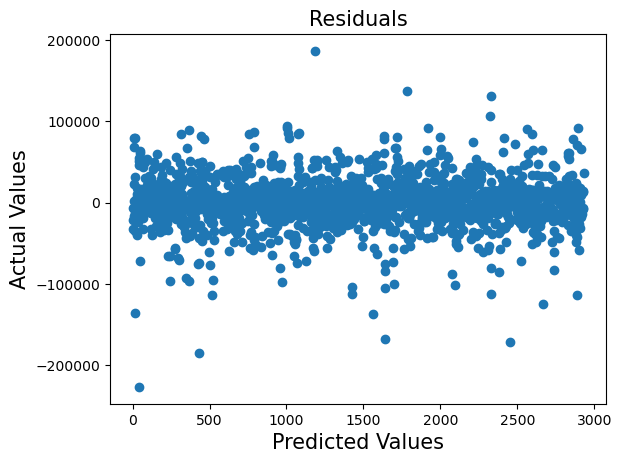

In [71]:
get_linear_regression(X,y)

#### Linear Regression with Neighborhood column expanded

After looking at the Neighborhood Column, I saw that there were some of the Neighborhood columns had coeffiecents that 
equaled 0 or very close.  I decided to remove these columns.

These neighborhoods that I will remove are:
- SWISU
- Veenker
- Sawyer
- GrnHill

In [72]:
#Removing these entries from the orginal dataframe first:

train_df = train_df[train_df['Neighborhood'] != 'SWISU']
train_df = train_df[train_df['Neighborhood'] != 'Veenker']
train_df = train_df[train_df['Neighborhood'] != 'Sawyer']
train_df = train_df[train_df['Neighborhood'] != 'GrnHill']

#find new list of features to insert into dataframe

#sorted(train_df)


In [73]:
new_features = ['MS SubClass', 'Lot Area', 'Overall Qual','Overall Cond', 'Year Built', 'Year Remod/Add',
                 'Total Bsmt SF','Gr Liv Area','Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd',
                 'Enclosed Porch', 'Screen Porch','Blueste', 'BrDale', 'BrkSide', 'ClearCr','CollgCr',
                 'Crawfor', 'Edwards', 'Gilbert', 'Greens', 'IDOTRR','MeadowV', 'Mitchel', 'NAmes', 
                 'NPkVill', 'NWAmes', 'NoRidge','NridgHt', 'OldTown', 'SawyerW', 'Somerst', 'StoneBr', 'Timber']

In [74]:
#Concatenate dataframes, with selected neighborhood removed in values and as features.

dummy = pd.get_dummies(train_df['Neighborhood'], drop_first=True)
train_df = pd.concat([train_df, dummy], axis=1)

X = train_df[new_features]
y = train_df['SalePrice']

train_df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,Greens,IDOTRR,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SawyerW,Somerst,StoneBr,Timber
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
544,531379050,60,RL,43.0,11492,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,0,4,2009,WD,220000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
153,535304180,20,RL,68.0,7922,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,0,1,2010,WD,109000,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
318,916386060,60,RL,73.0,9802,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,0,4,2010,WD,174000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
255,906425045,50,RL,82.0,14235,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,0,3,2010,WD,138500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
138,535126040,20,RL,137.0,16492,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,PosA,Norm,1Fam,1Story,6,6,1966,2002,Gable,CompShg,BrkFace,Plywood,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,247.0,Rec,713.0,557.0,1517.0,GasA,Ex,Y,SBrkr,1888,0,0,1888,0.0,0.0,2,1,2,1,Gd,6,Mod,1,Attchd,1966.0,Fin,2.0,578.0,TA,TA,Y,0,0,0,0,0,0,0,6,2010,WD,190000,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


Linear Regression R^2: 0.8805111528177256
Linear Regression Cross Validation: [0.87334236 0.86588013 0.88708056 0.86285881 0.86391683]
Root Mean Squared Error: 27900.315054504405

Linear Regression Train Cross Validation: [0.80054351 0.90005707 0.80414556 0.86671682 0.85522045]
Linear Regression Train R^2: 0.8851419547352448
Linear Regression Test R^2: 0.8792625139025614
Root Mean Squared Error Train: 27494.817025365108
Root Mean Squared Error Test: 28000.77203152048


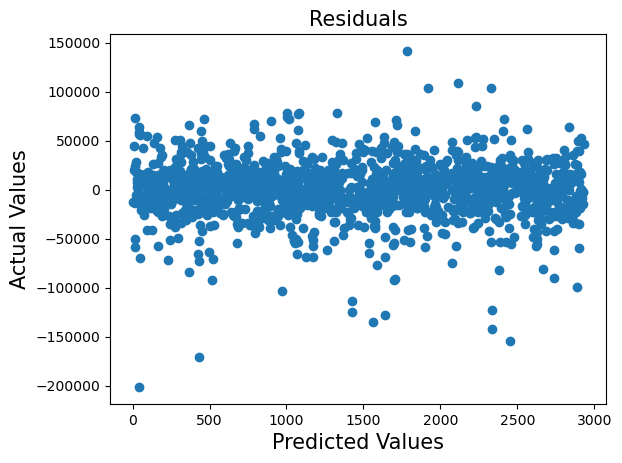

In [75]:
get_linear_regression(X, y)

By adding the Neighborhood feature and expanding it out, we have improved the RMSE score to 28000.77.  Also
the test RMSE is less than the train RMSE

## Model 1: Ridge Regression

#### After selected neighborhoods removed

In [76]:
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html
#https://stats.stackexchange.com/questions/416062/implementing-ridge-regression-in-python
#https://numpy.org/doc/stable/reference/generated/numpy.linspace.html

#Function for Ridge Regression train test

def get_ridge_regression(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)
    ss = StandardScaler()
    ss.fit(X_train)
    
    X_train_ss = ss.transform(X_train)
    X_test_ss = ss.transform(X_test)
    
    ridge = RidgeCV(alphas=np.linspace(0.1, 10, 100))
    ridge.fit(X_train_ss, y_train)                
                    
    coefficients = ridge.coef_
    ridge_train_score = ridge.score(X_train_ss, y_train)      
    ridge_test_score = ridge.score(X_test_ss, y_test)
    
    ridge_preds = ridge.predict(X_test_ss)
    ridge_resid = ridge_preds- y_test
    
    plt.scatter(ridge_resid.index, ridge_resid)
    plt.ylabel("Residual")
    plt.xlabel("Predicted Values");
    
    rmse_train_ridge = mean_squared_error(y_true=y_train, y_pred=ridge.predict(X_train_ss), squared=False)
    rmse_test_ridge = mean_squared_error(y_true=y_test, y_pred=ridge.predict(X_test_ss), squared=False)                
    
    print('The Ridge Coefficients are: ', coefficients)
    print('The train R^2 score is: ', ridge_train_score)
    print('The test R^2 score is: ', ridge_test_score)
    print('The train RMSE score is ', rmse_train_ridge)   
    print('The test RMSE score is ', rmse_test_ridge)          

The Ridge Coefficients are:  [-6513.66359261  8349.29528238 18670.49750023  6295.60384606
 17363.64492828  3170.17041473 13651.90797823 29587.72008956
 -9137.40499829 -2320.13083454  6118.25078304   959.42847328
  5104.72749077  -122.72209399   410.43589919  2634.22031213
  -566.35853901   106.24545855  4385.87736424   577.56223535
 -1391.73817941   263.86369297  1020.75723971  1557.33534928
   254.12772436   434.35636254   441.10957209 -3079.21936937
  4669.5625949  11948.43828594   -80.68854704 -1533.46208811
  2897.6385585   7906.80505325   678.52889764]
The train R^2 score is:  0.8795215198080035
The test R^2 score is:  0.8815575790404141
The train RMSE score is  28220.035297863684
The test RMSE score is  26946.72305559223


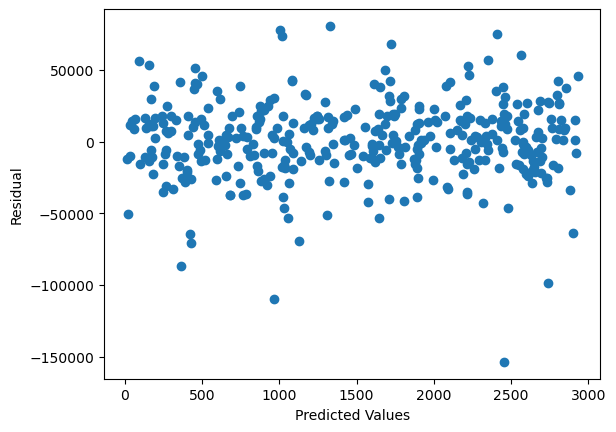

In [77]:
get_ridge_regression(X, y)

RMSE score has improved since removing the selected neighborhoods.  

It is also improved in that Ridge model has the 
test RMSE less than train RMSE. Test RMSE = 26946.72 and Train RMSE = 28220.04

## Model 1: Lasso Regression

In [78]:
#Function for Lasso Regression train test
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html

def get_lasso_regression(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)
    ss = StandardScaler()
    ss.fit(X_train)
    
    X_train_ss = ss.transform(X_train)
    X_test_ss = ss.transform(X_test)
    
    lasso = LassoCV(n_alphas= 200)
    lasso.fit(X_train_ss, y_train)
    
    alpha = lasso.alpha_
                    
    r2_train_lasso = lasso.score(X_train_ss, y_train)
    r2_test_lasso = lasso.score(X_test_ss, y_test)
    
    
    lasso_preds = lasso.predict(X_test_ss)
    lasso_resid = lasso_preds- y_test
    
    plt.scatter(lasso_resid.index, lasso_resid)
    plt.ylabel("Residual")
    plt.xlabel("Predicted Values");
    
    rmse_train_lasso = mean_squared_error(y_true=y_train, y_pred=lasso.predict(X_train_ss), squared=False)
    rmse_test_lasso = mean_squared_error(y_true=y_test, y_pred=lasso.predict(X_test_ss), squared=False)                
    
    print('The Alpha for Lasso is: ', alpha)
    print('The train R^2 score is: ', r2_train_lasso)
    print('The test R^2 score is: ', r2_test_lasso)
    print('The train RMSE score is ', rmse_train_lasso)   
    print('The test RMSE score is ', rmse_test_lasso)          

The Alpha for Lasso is:  271.56048241226995
The train R^2 score is:  0.8791190454918212
The test R^2 score is:  0.882595239249186
The train RMSE score is  28267.132379476836
The test RMSE score is  26828.424840559244


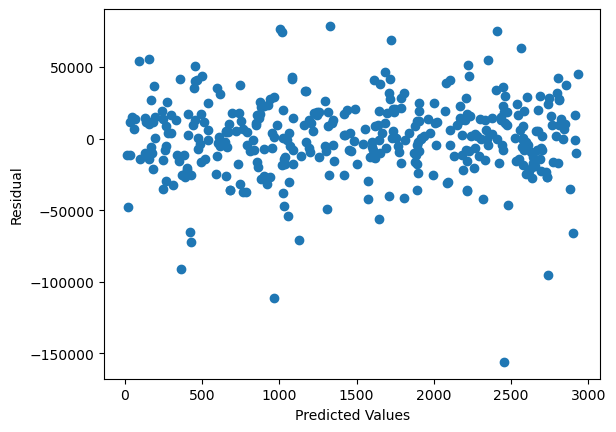

In [79]:
get_lasso_regression(X, y)

The Linear Regression model has improved from our baseline model with:

    - Linear Regression Train RMSE is: 28267.13
    - Linear Regression Test RMSE is:  26828.42

Also it should be noted that the Test RMSE is less than the Train RMSE which is why it is better than the baseline model. 
Since the Lasso Regression model did not improve the RMSE, it could be due to overfitting.

## Model 2: Linear & Lasso Regression

In model I plan to alter the features column by:

    - adding: 'Mas Vnr Area'
    -removing neighborhoods: 'Greens', 'NPKVill', 'OldTown', and 'Timber'
        
I played around with the features and added features that high correlation with SalePrice and removed 
neighborhoods that furthr had low coefficents and did seem as correlated with SalePrice.

In [80]:
features_2 = ['MS SubClass', 'Lot Area', 'Overall Qual','Overall Cond', 'Year Built', 'Year Remod/Add',
'Total Bsmt SF','Gr Liv Area','Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd','Enclosed Porch',
'Screen Porch','Blueste', 'BrDale', 'BrkSide', 'ClearCr','CollgCr','Crawfor', 'Edwards', 'Gilbert',
'IDOTRR','MeadowV', 'Mitchel', 'NAmes', 'NWAmes', 'NoRidge','NridgHt', 'SawyerW', 'Somerst', 'StoneBr', 'Mas Vnr Area']


X = train_df[features_2]
y= train_df['SalePrice']

The Alpha for Lasso is:  262.2957142948243
The train R^2 score is:  0.8841242229812429
The test R^2 score is:  0.888268297722422
The train RMSE score is  27675.733638577974
The test RMSE score is  26172.217982339374


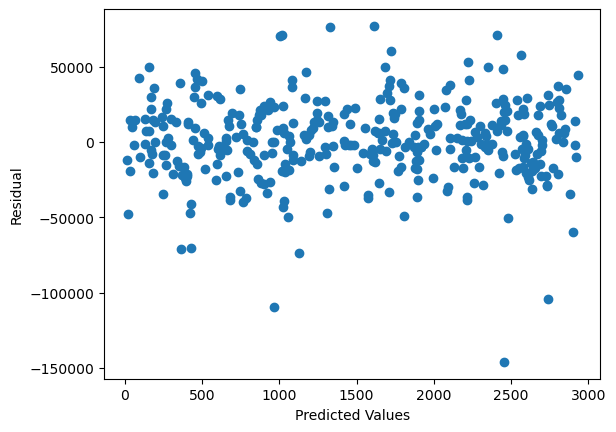

In [81]:
get_lasso_regression(X, y)

Linear Regression R^2: 0.885370129202387
Linear Regression Cross Validation: [0.87561394 0.86812304 0.88987868 0.86970368 0.87270706]
Root Mean Squared Error: 27327.148908250972

Linear Regression Train Cross Validation: [0.80588327 0.90336142 0.84124146 0.87355664 0.8632219 ]
Linear Regression Train R^2: 0.8903884843645175
Linear Regression Test R^2: 0.8840263501672101
Root Mean Squared Error Train: 26859.51799900307
Root Mean Squared Error Test: 27442.81158213313


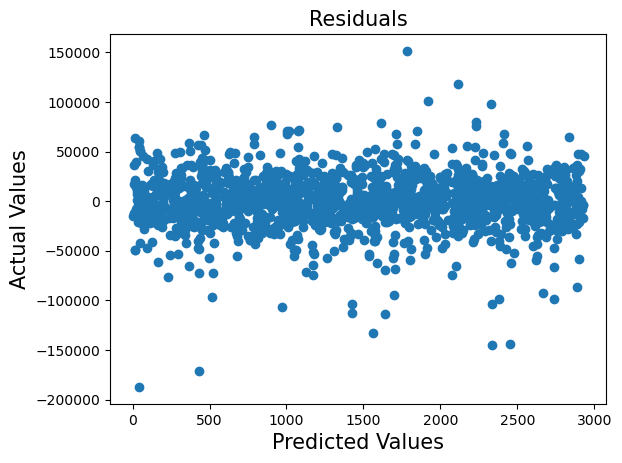

In [82]:
get_linear_regression(X, y)

Lasso Regression:
    
    The RMSE for both the training and testing splits are lower than model 1 values using lasso regression.  
    This indicates that removing/adding the selected features gave a better model.
    
Linear Regresssion:
    The RMSE for both the training and testing splits are lower than model 1 values using linear regression.  
    This indicates that removing/adding the selected features gave a better model.
    

# Model 3: Linear and Lasso Regression

In [83]:
train_df_3 = train_df[['MS SubClass', 'Lot Area', 'Overall Qual','Overall Cond', 'Year Built', 'Year Remod/Add',
'Total Bsmt SF','Gr Liv Area','Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd','Enclosed Porch',
'Screen Porch', 'Neighborhood', 'Kitchen Qual', 'Exter Qual', 'Mas Vnr Area', 'Garage Area']]

In [84]:
dummy_3 = pd.get_dummies(columns = ['Kitchen Qual', 'Exter Qual', 'Neighborhood'], drop_first=True, data = train_df)

train_df_3 = pd.concat([train_df_3, dummy_3], axis=1)

In [85]:
train_df_3.drop(columns = ['Blueste', 'BrDale', 'BrkSide', 'ClearCr',
       'CollgCr', 'Crawfor', 'Edwards', 'Gilbert', 'Greens', 'IDOTRR',
       'MeadowV', 'Mitchel', 'NAmes', 'NPkVill', 'NWAmes', 'NoRidge',
       'NridgHt', 'OldTown', 'SawyerW', 'Somerst', 'StoneBr', 'Timber'], inplace = True)

In [86]:
train_df_3 = train_df_3.loc[:,~train_df_3.columns.duplicated()]

In [87]:
train_df_3.head()

,MS SubClass,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Total Bsmt SF,Gr Liv Area,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Enclosed Porch,Screen Porch,Neighborhood,Kitchen Qual,Exter Qual,Mas Vnr Area,Garage Area,PID,MS Zoning,Lot Frontage,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Heating,Heating QC,Central Air,...,Bsmt Half Bath,Full Bath,Half Bath,Functional,Fireplaces,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,3Ssn Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,Kitchen Qual_Fa,Kitchen Qual_Gd,Kitchen Qual_TA,Exter Qual_Fa,Exter Qual_Gd,Exter Qual_TA,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
544,60,11492,7,5,1996,1997,913.0,2122,4,1,8,0,0,SawyerW,Gd,Gd,132.0,559.0,531379050,RL,43.0,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,GasA,Ex,Y,...,0.0,2,1,Typ,1,Attchd,1997.0,RFn,2.0,TA,TA,Y,0,74,0,0,0,4,2009,WD,220000,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
153,20,7922,5,7,1953,2007,1057.0,1057,3,1,5,0,0,NAmes,Gd,TA,0.0,246.0,535304180,RL,68.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,GasA,TA,Y,...,0.0,1,0,Typ,0,Detchd,1953.0,Unf,1.0,TA,TA,Y,0,52,0,0,0,1,2010,WD,109000,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
318,60,9802,5,5,2006,2007,384.0,1444,3,1,7,0,0,Timber,TA,TA,0.0,400.0,916386060,RL,73.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,GasA,Gd,Y,...,0.0,2,1,Typ,0,BuiltIn,2007.0,Fin,2.0,TA,TA,Y,100,0,0,0,0,4,2010,WD,174000,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
255,50,14235,6,8,1900,1993,676.0,1445,3,1,6,0,0,SawyerW,TA,TA,0.0,484.0,906425045,RL,82.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,Wd Sdng,Plywood,None,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,GasA,TA,Y,...,0.0,2,0,Typ,0,Detchd,1957.0,Unf,2.0,TA,TA,N,0,59,0,0,0,3,2010,WD,138500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
138,20,16492,6,6,1966,2002,1517.0,1888,2,1,6,0,0,NAmes,Gd,Gd,0.0,578.0,535126040,RL,137.0,Pave,IR1,Lvl,AllPub,Corner,Gtl,PosA,Norm,1Fam,1Story,Gable,CompShg,BrkFace,Plywood,None,TA,CBlock,TA,TA,No,ALQ,247.0,Rec,713.0,557.0,GasA,Ex,Y,...,0.0,2,1,Mod,1,Attchd,1966.0,Fin,2.0,TA,TA,Y,0,0,0,0,0,6,2010,WD,190000,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [88]:
train_df_3[train_df_3['Mas Vnr Area'].isnull()]

,MS SubClass,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Total Bsmt SF,Gr Liv Area,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Enclosed Porch,Screen Porch,Neighborhood,Kitchen Qual,Exter Qual,Mas Vnr Area,Garage Area,PID,MS Zoning,Lot Frontage,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Heating,Heating QC,Central Air,...,Bsmt Half Bath,Full Bath,Half Bath,Functional,Fireplaces,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,3Ssn Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,Kitchen Qual_Fa,Kitchen Qual_Gd,Kitchen Qual_TA,Exter Qual_Fa,Exter Qual_Gd,Exter Qual_TA,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [89]:
train_df_3['Mas Vnr Area'] = train_df_3['Mas Vnr Area'].fillna(0)

In [90]:
features_3 = ['MS SubClass', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built','Year Remod/Add',
              'Total Bsmt SF', 'Gr Liv Area', 'Bedroom AbvGr','Kitchen AbvGr', 'TotRms AbvGrd',
              'Enclosed Porch', 'Screen Porch','Garage Area', 'Mas Vnr Area', 'Neighborhood_BrDale',
              'Neighborhood_BrkSide','Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert',
              'Neighborhood_Greens', 'Neighborhood_IDOTRR','Neighborhood_Mitchel', 'Neighborhood_NAmes',
              'Neighborhood_NPkVill','Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
              'Neighborhood_OldTown', 'Neighborhood_SawyerW', 'Neighborhood_Somerst','Neighborhood_StoneBr',
              'Kitchen Qual_Fa','Kitchen Qual_Gd', 'Kitchen Qual_TA', 'Exter Qual_Fa', 'Exter Qual_Gd',
              'Exter Qual_TA']

X = train_df_3[features_3]
y = train_df['SalePrice']

The Alpha for Lasso is:  75.17572528047066
The train R^2 score is:  0.9067634053922724
The test R^2 score is:  0.9109417276854584
The train RMSE score is  24825.386228788833
The test RMSE score is  23366.273401784565


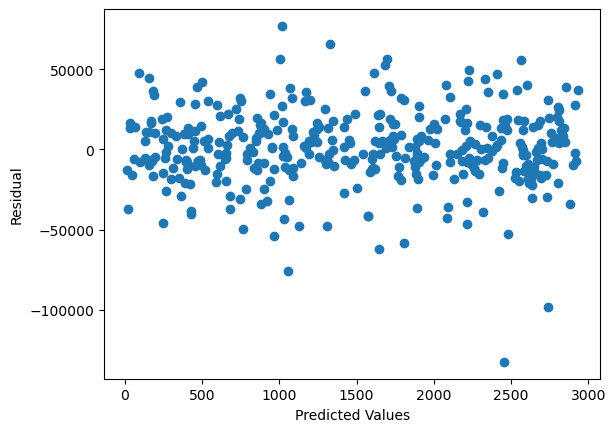

In [91]:
get_lasso_regression(X, y)

Linear Regression R^2: 0.9078554794207032
Linear Regression Cross Validation: [0.90131968 0.90091758 0.91127498 0.88787391 0.89390427]
Root Mean Squared Error: 24500.795152521627

Linear Regression Train Cross Validation: [0.83704599 0.9161085  0.86780908 0.89599954 0.89115529]
Linear Regression Train R^2: 0.9159836537727281
Linear Regression Test R^2: 0.9057378784177766
Root Mean Squared Error Train: 23515.38095072939
Root Mean Squared Error Test: 24741.016926711043


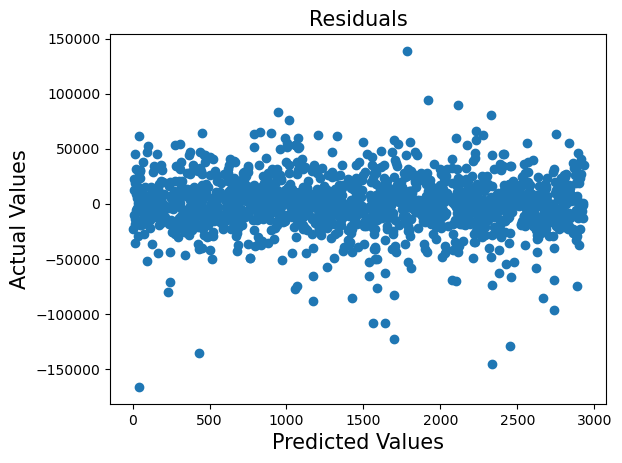

In [92]:
get_linear_regression(X,y)

For Model 3 I added 'Kitchen Quality' and 'Exterior Quality' to the features list. This led to a decrease in RMSE.The LASSO regression for model 3 had an RMSE yet: 23366.27 and the linear regression model had an 
RMSE: 24741.01.  There are negative coefficients for this model 3.Indicating that these features can bring the value of the property of the home depending on the value.Furthermore, the test RMSE was lower than the train RMSE for both the lasso and linear regression in model 3.

The LASSO regression in model 3 had the lowest RMSE out of all the models.

# Summary of Model Findings

Baseline Linear Regression:
        
        - variables:
            - X = train_df[['Overall Qual', 'Gr Liv Area', 'Garage Area',
                      'Garage Cars', 'Total Bsmt SF']]
                      
            - y = train_df['SalePrice']
           
            
        - baseline Linear Regression R^2 score is:  0.8497941951996909
        - baseline Linear Regression RMSE is:  30728.586965132643

Model 1:
        - variables:
            
            - X = train_df[new_features] 
            
            - y = train_df['SalePrice']
            
    Linear Regression:
        - Linear Regression Train R^2 score is: 0.8672271212225483
        - Linear Regression Test R^2 score is: 0.8455755992297344
        - Linear Regression Train RMSE is: 28527.82520569859
        - Linear Regression Test RMSE is: 31253.93672624788
    
    Ridge Regression:
        - train R^2 score is:  0.8795215198080035
        - test R^2 score is:  0.8815575790404141
        - train RMSE score is  28220.035297863684
        - test RMSE score is  26946.72305559223
    
    Lasso Regression:
        - train R^2 score is:  0.8791190454918212
        - test R^2 score is:  0.882595239249186
        - train RMSE score is  28267.132379476836
        - test RMSE score is  26828.424840559244

Model 2:
        - variables:
        
            - X = train_df[features_2]
            
            - y= train_df['SalePrice']
            
    Linear Regression:
        - Linear Regression Train R^2 score is: 0.8903884843645175
        - Linear Regression Test R^2 score is: 0.8840263501672101
        - Linear Regression Train RMSE is: 26859.51799900307
        - Linear Regression Test RMSE is: 27442.81158213313
    
    Lasso Regression:
        - train R^2 score is:  0.8841242229812429
        - test R^2 score is:  0.888268297722422
        - train RMSE score is  27675.733638577974
        - test RMSE score is  26172.217982339374

Model 3:
        - variables:
        
            - X = train_df_3[features_3]
            
            - y = train_df['SalePrice']
    
    Linear Regression:
        - Linear Regression Train R^2 score is: 0.9159836537727281
        - Linear Regression Test R^2 score is: 0.9057378784177766
        - Linear Regression Train RMSE is: 23515.38095072939
        - Linear Regression Test RMSE is: 24741.016926711043
    
    Lasso Regression:
        - train R^2 score is: 0.9067634053922724
        - test R^2 score is: 0.9109417276854584
        - train RMSE score is: 24825.386228788833
        - test RMSE score is: 23366.273401784565

# Final Train Datasets

In [93]:
final_train = train_df[new_features]
final_train.to_csv('./datasets/train_final.csv', index=True)

In [94]:
final_train_2 = train_df[features_2]
final_train_2.to_csv('./datasets/train_final_2.csv', index=True)

In [95]:
final_train_3 = train_df_3[features_3]
final_train_3.to_csv('./datasets/train_final_3.csv', index=True)

In [96]:
sale_price = pd.DataFrame(train_df[['SalePrice']])
sale_price.to_csv('./datasets/SalePrice.csv', index=True)

# Cleaning Test Datasets

### Cleaning Dataset for model 1

In [97]:
test_df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [98]:
#view nulls and data types
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               878 non-null    int64  
 1   PID              878 non-null    int64  
 2   MS SubClass      878 non-null    int64  
 3   MS Zoning        878 non-null    object 
 4   Lot Frontage     718 non-null    float64
 5   Lot Area         878 non-null    int64  
 6   Street           878 non-null    object 
 7   Alley            58 non-null     object 
 8   Lot Shape        878 non-null    object 
 9   Land Contour     878 non-null    object 
 10  Utilities        878 non-null    object 
 11  Lot Config       878 non-null    object 
 12  Land Slope       878 non-null    object 
 13  Neighborhood     878 non-null    object 
 14  Condition 1      878 non-null    object 
 15  Condition 2      878 non-null    object 
 16  Bldg Type        878 non-null    object 
 17  House Style     

In [99]:
#Removing index
test_df.set_index("Id", inplace = True)

In [100]:
test_feat_1 = ['MS SubClass', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Total Bsmt SF', 'Gr Liv Area', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'TotRms AbvGrd', 'Enclosed Porch', 'Screen Porch', 'Neighborhood']

In [101]:
test_df_1 = test_df[test_feat_1]

In [102]:
test_df_1.isnull().sum()

MS SubClass       0
Lot Area          0
Overall Qual      0
Overall Cond      0
Year Built        0
Year Remod/Add    0
Total Bsmt SF     0
Gr Liv Area       0
Bedroom AbvGr     0
Kitchen AbvGr     0
TotRms AbvGrd     0
Enclosed Porch    0
Screen Porch      0
Neighborhood      0
dtype: int64

In [103]:
dummy_neigh = pd.get_dummies(test_df_1['Neighborhood'], drop_first=True)
test_df_1 = pd.concat([test_df_1, dummy_neigh], axis=1)

In [104]:
test_df_1.drop(columns = ['Veenker', 'Sawyer', 'SWISU'], inplace = True)


In [105]:
test_df_1.drop(columns=['Neighborhood'], inplace=True)


In [106]:
test_df_1.shape

(878, 35)

In [107]:
test_df_1 = test_df_1.loc[:,~test_df_1.columns.duplicated()].copy()

In [108]:
test_df_1.head()

,MS SubClass,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Total Bsmt SF,Gr Liv Area,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Enclosed Porch,Screen Porch,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,Greens,IDOTRR,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SawyerW,Somerst,StoneBr,Timber
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2658,190,9142,6,8,1910,1950,1020,1928,4,2,9,112,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2718,90,9662,5,4,1977,1977,1967,1967,6,2,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2414,60,17104,7,5,2006,2006,654,1496,3,1,7,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1989,30,8520,5,6,1923,2006,968,968,2,1,5,184,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
625,20,9500,6,5,1963,1963,1394,1394,3,1,6,0,185,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [109]:
X_test = test_df_1[['MS SubClass', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Total Bsmt SF', 'Gr Liv Area', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'TotRms AbvGrd', 'Enclosed Porch', 'Screen Porch',
       'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr', 'Crawfor',
       'Edwards', 'Gilbert', 'Greens', 'IDOTRR', 'MeadowV', 'Mitchel', 'NAmes',
       'NPkVill', 'NWAmes', 'NoRidge', 'NridgHt', 'OldTown',
       'SawyerW', 'Somerst', 'StoneBr', 'Timber']]

In [110]:
# Define Train
X_train = final_train

# Define Test
X_test = test_df_1

#Define y
y_fin = sale_price

### Model 1 with test dataset

#### Linear Regression

Linear Regression R^2: 0.8805111528177256
Linear Regression Cross Validation: [0.87334236 0.86588013 0.88708056 0.86285881 0.86391683]
Root Mean Squared Error: 27900.315054504405

Linear Regression Train Cross Validation: [0.80054351 0.90005707 0.80414556 0.86671682 0.85522045]
Linear Regression Train R^2: 0.8851419547352448
Linear Regression Test R^2: 0.8792625139025614
Root Mean Squared Error Train: 27494.817025365108
Root Mean Squared Error Test: 28000.77203152048


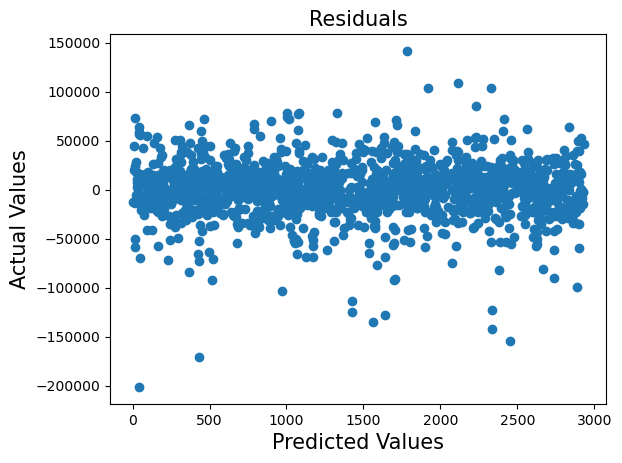

In [111]:
get_linear_regression(X=X_train, y=y_fin)

#### Lasso Regression

In [112]:
# Scale
ss = StandardScaler()

# Fit
ss.fit(X_train)

# Transform
tra_train = ss.fit_transform(X_train)
tra_test = ss.transform(X_test)

In [113]:
lasso = LassoCV(n_alphas=200)

# Fit Model
lasso.fit(tra_train, y_fin)

C:\Users\ianst\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1614: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LassoCV(n_alphas=200)

In [114]:
# RMSE Z-Train
mean_squared_error(y_true=y_fin, y_pred=lasso.predict(tra_train), squared=False)

27957.609045548274

In [115]:
# Predict Z-Test
sale_prediction = lasso.predict(tra_test)
sale_prediction

array([142029.21307333, 174549.21493901, 194045.78044699, 110275.03079399,
       183409.07599331,  85036.0883517 , 120489.80286808, 162497.08124029,
       196131.66836417, 171043.93390187, 154230.70553944, 136349.1619164 ,
       171799.02619645, 238685.23466396, 196784.7673254 , 120613.31922731,
       119044.70434928, 128739.85066169, 213196.28483431, 182981.92988777,
       146740.03447553, 105283.83920622, 195089.55590161, 150567.99874529,
       193256.95823611, 115979.01371094, 114718.94276256, 120232.28246241,
       133085.76691167,  39280.45509375, 104518.29492648,  95109.10519812,
       224743.88277445, 135423.0043134 , 230964.58301091, 183572.76083772,
       124678.0071546 ,  71335.82595682,  92493.4656884 , 206662.2270964 ,
       151441.04663269, 213893.89329618, 150763.4339166 , 181244.136657  ,
       208982.39199409, 107872.20584619, 214586.90166645, 103205.45104602,
       138405.31030098, 117891.1597465 , 117640.09067125, 205758.15499463,
       248096.50276182, 1

In [116]:
test_df_1['SalePrice'] = sale_prediction
test_df_1.head()

,MS SubClass,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Total Bsmt SF,Gr Liv Area,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Enclosed Porch,Screen Porch,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,Greens,IDOTRR,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SawyerW,Somerst,StoneBr,Timber,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2658,190,9142,6,8,1910,1950,1020,1928,4,2,9,112,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,142029.213073
2718,90,9662,5,4,1977,1977,1967,1967,6,2,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,174549.214939
2414,60,17104,7,5,2006,2006,654,1496,3,1,7,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,194045.780447
1989,30,8520,5,6,1923,2006,968,968,2,1,5,184,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,110275.030794
625,20,9500,6,5,1963,1963,1394,1394,3,1,6,0,185,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,183409.075993


In [117]:
submission_1 = test_df_1[['SalePrice']].sort_values(by='Id')
submission_1.head()

,SalePrice
Id,
2,130895.341395
4,262552.049283
6,188799.268983
7,261526.333966
17,211484.725663


In [118]:
submission_1.to_csv('./datasets/submission_1.csv', index=True)

### Cleaning test dataset for model 2

In [119]:
test_feat_2 =  ['MS SubClass', 'Lot Area', 'Overall Qual','Overall Cond', 'Year Built', 'Year Remod/Add',
'Total Bsmt SF','Gr Liv Area','Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd','Enclosed Porch','Screen Porch',
                'Neighborhood', 'Mas Vnr Area']


In [120]:
test_df_2 = train_df[test_feat_2]

In [121]:
dummy_neigh_2 = pd.get_dummies(test_df_2['Neighborhood'], drop_first=True)
test_df_2 = pd.concat([test_df_2, dummy_neigh_2], axis=1)

In [122]:
test_df_2.columns

Index(['MS SubClass', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Total Bsmt SF', 'Gr Liv Area', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'TotRms AbvGrd', 'Enclosed Porch', 'Screen Porch',
       'Neighborhood', 'Mas Vnr Area', 'Blueste', 'BrDale', 'BrkSide',
       'ClearCr', 'CollgCr', 'Crawfor', 'Edwards', 'Gilbert', 'Greens',
       'IDOTRR', 'MeadowV', 'Mitchel', 'NAmes', 'NPkVill', 'NWAmes', 'NoRidge',
       'NridgHt', 'OldTown', 'SawyerW', 'Somerst', 'StoneBr', 'Timber'],
      dtype='object')

In [123]:
test_df_2.drop(columns = ['Neighborhood', 'Greens', 'NPkVill', 'OldTown', 'Timber'], inplace = True)

In [124]:
test_df_2.isnull().sum()

MS SubClass       0
Lot Area          0
Overall Qual      0
Overall Cond      0
Year Built        0
Year Remod/Add    0
Total Bsmt SF     0
Gr Liv Area       0
Bedroom AbvGr     0
Kitchen AbvGr     0
TotRms AbvGrd     0
Enclosed Porch    0
Screen Porch      0
Mas Vnr Area      0
Blueste           0
BrDale            0
BrkSide           0
ClearCr           0
CollgCr           0
Crawfor           0
Edwards           0
Gilbert           0
IDOTRR            0
MeadowV           0
Mitchel           0
NAmes             0
NWAmes            0
NoRidge           0
NridgHt           0
SawyerW           0
Somerst           0
StoneBr           0
dtype: int64

In [125]:
X_test_2 = test_df_2[['MS SubClass', 'Lot Area', 'Overall Qual','Overall Cond', 'Year Built', 'Year Remod/Add',
'Total Bsmt SF','Gr Liv Area','Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd','Enclosed Porch',
'Screen Porch','Blueste', 'BrDale', 'BrkSide', 'ClearCr','CollgCr','Crawfor', 'Edwards', 'Gilbert',
'IDOTRR','MeadowV', 'Mitchel', 'NAmes', 'NWAmes', 'NoRidge','NridgHt', 'SawyerW', 'Somerst', 'StoneBr', 'Mas Vnr Area']]


In [126]:
X_test_2.head()

,MS SubClass,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Total Bsmt SF,Gr Liv Area,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Enclosed Porch,Screen Porch,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,Mitchel,NAmes,NWAmes,NoRidge,NridgHt,SawyerW,Somerst,StoneBr,Mas Vnr Area
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
544,60,11492,7,5,1996,1997,913.0,2122,4,1,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,132.0
153,20,7922,5,7,1953,2007,1057.0,1057,3,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.0
318,60,9802,5,5,2006,2007,384.0,1444,3,1,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
255,50,14235,6,8,1900,1993,676.0,1445,3,1,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0
138,20,16492,6,6,1966,2002,1517.0,1888,2,1,6,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.0


In [127]:
# Define Train
X_train_2 = final_train_2

### Model 2 with test dataset

Linear Regression R^2: 0.885370129202387
Linear Regression Cross Validation: [0.87561394 0.86812304 0.88987868 0.86970368 0.87270706]
Root Mean Squared Error: 27327.148908250972

Linear Regression Train Cross Validation: [0.80588327 0.90336142 0.84124146 0.87355664 0.8632219 ]
Linear Regression Train R^2: 0.8903884843645175
Linear Regression Test R^2: 0.8840263501672101
Root Mean Squared Error Train: 26859.51799900307
Root Mean Squared Error Test: 27442.81158213313


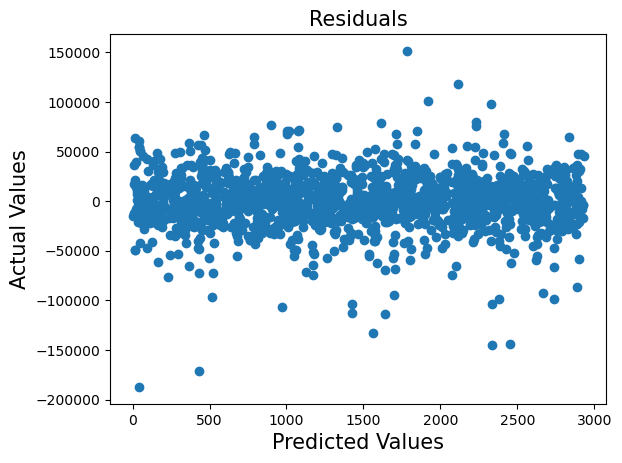

In [128]:
get_linear_regression(X=X_train_2, y=y_fin)

In [129]:
ss = StandardScaler()
tra_train_2 = ss.fit_transform(X_train_2)
tra_test_2 = ss.transform(X_test_2)

In [130]:
lasso = LassoCV(n_alphas=200)

# Fit Model
lasso.fit(tra_train_2, y_fin)

C:\Users\ianst\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1614: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LassoCV(n_alphas=200)

In [131]:
#RMSE Z-Train
mean_squared_error(y_true=y_fin, y_pred=lasso.predict(tra_train_2), squared=False)

27361.074812744548

In [132]:
# Predict Z-Test
sale_prediction_2 = lasso.predict(tra_test_2)
sale_prediction_2

array([223532.60868487, 129439.1316087 , 153395.04833089, ...,
       190377.53144574, 117753.62628355, 207544.81684487])

In [133]:
test_df_2['SalePrice'] = sale_prediction_2
test_df_2.head()

,MS SubClass,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Total Bsmt SF,Gr Liv Area,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Enclosed Porch,Screen Porch,Mas Vnr Area,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,Mitchel,NAmes,NWAmes,NoRidge,NridgHt,SawyerW,Somerst,StoneBr,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
544,60,11492,7,5,1996,1997,913.0,2122,4,1,8,0,0,132.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,223532.608685
153,20,7922,5,7,1953,2007,1057.0,1057,3,1,5,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,129439.131609
318,60,9802,5,5,2006,2007,384.0,1444,3,1,7,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,153395.048331
255,50,14235,6,8,1900,1993,676.0,1445,3,1,6,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,131998.041070
138,20,16492,6,6,1966,2002,1517.0,1888,2,1,6,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,230357.930014


In [134]:
submission_2 = test_df_2[['SalePrice']].sort_values(by='Id')
submission_2.head()

,SalePrice
Id,
1,199910.709638
3,169761.115088
5,171611.328271
8,250278.585506
9,273465.767666


In [135]:
submission_2.to_csv('./datasets/submission_2.csv', index=True)

# Cleaning test dataset for model 3

In [136]:
test_df_3 = test_df[['MS SubClass', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Total Bsmt SF', 'Gr Liv Area', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'TotRms AbvGrd', 'Enclosed Porch', 'Screen Porch',
       'Garage Area', 'Mas Vnr Area', 'Neighborhood', 'Kitchen Qual', 'Exter Qual']]


In [137]:
dummy_3 = pd.get_dummies(columns =['Neighborhood', 'Exter Qual', 'Kitchen Qual'], drop_first=True, data=test_df_3)
test_df_3 = pd.concat([test_df_3, dummy_3], axis=1)

In [138]:
test_df_3 = test_df_3.loc[:,~test_df_3.columns.duplicated()]
test_df_3.columns.values

array(['MS SubClass', 'Lot Area', 'Overall Qual', 'Overall Cond',
       'Year Built', 'Year Remod/Add', 'Total Bsmt SF', 'Gr Liv Area',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd',
       'Enclosed Porch', 'Screen Porch', 'Garage Area', 'Mas Vnr Area',
       'Neighborhood', 'Kitchen Qual', 'Exter Qual',
       'Neighborhood_Blueste', 'Neighborhood_BrDale',
       'Neighborhood_BrkSide', 'Neighborhood_ClearCr',
       'Neighborhood_CollgCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_Gilbert',
       'Neighborhood_Greens', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV', 'Neighborhood_Mitchel',
       'Neighborhood_NAmes', 'Neighborhood_NPkVill',
       'Neighborhood_NWAmes', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown',
       'Neighborhood_SWISU', 'Neighborhood_Sawyer',
       'Neighborhood_SawyerW', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Neighborhood_Timber',
       'Neighborhood_Veenker',

In [139]:
train_df_3

,MS SubClass,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Total Bsmt SF,Gr Liv Area,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Enclosed Porch,Screen Porch,Neighborhood,Kitchen Qual,Exter Qual,Mas Vnr Area,Garage Area,PID,MS Zoning,Lot Frontage,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Heating,Heating QC,Central Air,...,Bsmt Half Bath,Full Bath,Half Bath,Functional,Fireplaces,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,3Ssn Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,Kitchen Qual_Fa,Kitchen Qual_Gd,Kitchen Qual_TA,Exter Qual_Fa,Exter Qual_Gd,Exter Qual_TA,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
544,60,11492,7,5,1996,1997,913.0,2122,4,1,8,0,0,SawyerW,Gd,Gd,132.0,559.0,531379050,RL,43.0,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,GasA,Ex,Y,...,0.0,2,1,Typ,1,Attchd,1997.0,RFn,2.0,TA,TA,Y,0,74,0,0,0,4,2009,WD,220000,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
153,20,7922,5,7,1953,2007,1057.0,1057,3,1,5,0,0,NAmes,Gd,TA,0.0,246.0,535304180,RL,68.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,GasA,TA,Y,...,0.0,1,0,Typ,0,Detchd,1953.0,Unf,1.0,TA,TA,Y,0,52,0,0,0,1,2010,WD,109000,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
318,60,9802,5,5,2006,2007,384.0,1444,3,1,7,0,0,Timber,TA,TA,0.0,400.0,916386060,RL,73.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,GasA,Gd,Y,...,0.0,2,1,Typ,0,BuiltIn,2007.0,Fin,2.0,TA,TA,Y,100,0,0,0,0,4,2010,WD,174000,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
255,50,14235,6,8,1900,1993,676.0,1445,3,1,6,0,0,SawyerW,TA,TA,0.0,484.0,906425045,RL,82.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,Wd Sdng,Plywood,None,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,GasA,TA,Y,...,0.0,2,0,Typ,0,Detchd,1957.0,Unf,2.0,TA,TA,N,0,59,0,0,0,3,2010,WD,138500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
138,20,16492,6,6,1966,2002,1517.0,1888,2,1,6,0,0,NAmes,Gd,Gd,0.0,578.0,535126040,RL,137.0,Pave,IR1,Lvl,AllPub,Corner,Gtl,PosA,Norm,1Fam,1Story,Gable,CompShg,BrkFace,Plywood,None,TA,CBlock,TA,TA,No,ALQ,247.0,Rec,713.0,557.0,GasA,Ex,Y,...,0.0,2,1,Mod,1,Attchd,1966.0,Fin,2.0,TA,TA,Y,0,0,0,0,0,6,2010,WD,190000,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1587,20,11449,8,5,2007,2007,1884.0,1728,3,1,7,0,0,Timber,Gd,Gd,0.0,520.0,921126030,RL,79.0,Pave,IR1,HLS,AllPub,Inside,Gtl,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,PConc,Gd,TA,Av,GLQ,1011.0,Unf,0.0,873.0,GasA,Ex,Y,...,0.0,2,0,Typ,1,Attchd,2007.0,Fin,2.0,TA,TA,Y,0,276,0,0,0,1,2008,WD,298751,0,1,0,0

In [140]:
test_df_3.isnull().sum()

MS SubClass             0
Lot Area                0
Overall Qual            0
Overall Cond            0
Year Built              0
Year Remod/Add          0
Total Bsmt SF           0
Gr Liv Area             0
Bedroom AbvGr           0
Kitchen AbvGr           0
TotRms AbvGrd           0
Enclosed Porch          0
Screen Porch            0
Garage Area             0
Mas Vnr Area            1
Neighborhood            0
Kitchen Qual            0
Exter Qual              0
Neighborhood_Blueste    0
Neighborhood_BrDale     0
Neighborhood_BrkSide    0
Neighborhood_ClearCr    0
Neighborhood_CollgCr    0
Neighborhood_Crawfor    0
Neighborhood_Edwards    0
Neighborhood_Gilbert    0
Neighborhood_Greens     0
Neighborhood_IDOTRR     0
Neighborhood_MeadowV    0
Neighborhood_Mitchel    0
Neighborhood_NAmes      0
Neighborhood_NPkVill    0
Neighborhood_NWAmes     0
Neighborhood_NoRidge    0
Neighborhood_NridgHt    0
Neighborhood_OldTown    0
Neighborhood_SWISU      0
Neighborhood_Sawyer     0
Neighborhood

In [141]:
test_df_3[test_df_3['Mas Vnr Area'].isnull()]

,MS SubClass,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Total Bsmt SF,Gr Liv Area,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Enclosed Porch,Screen Porch,Garage Area,Mas Vnr Area,Neighborhood,Kitchen Qual,Exter Qual,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Exter Qual_Fa,Exter Qual_Gd,Exter Qual_TA,Kitchen Qual_Fa,Kitchen Qual_Gd,Kitchen Qual_Po,Kitchen Qual_TA
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
868,60,8749,7,5,2002,2002,840,1725,3,1,6,0,0,550,NaN,CollgCr,Gd,Gd,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [142]:
test_df_3['Mas Vnr Area'] = test_df_3['Mas Vnr Area'].fillna(0)

In [143]:
X_test_3 = test_df_3[['MS SubClass', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built','Year Remod/Add',
              'Total Bsmt SF', 'Gr Liv Area', 'Bedroom AbvGr','Kitchen AbvGr', 'TotRms AbvGrd',
              'Enclosed Porch', 'Screen Porch','Garage Area', 'Mas Vnr Area', 'Neighborhood_BrDale',
              'Neighborhood_BrkSide','Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert',
              'Neighborhood_Greens', 'Neighborhood_IDOTRR','Neighborhood_Mitchel', 'Neighborhood_NAmes',
              'Neighborhood_NPkVill','Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
              'Neighborhood_OldTown', 'Neighborhood_SawyerW', 'Neighborhood_Somerst','Neighborhood_StoneBr',
              'Kitchen Qual_Fa','Kitchen Qual_Gd', 'Kitchen Qual_TA', 'Exter Qual_Fa', 'Exter Qual_Gd','Exter Qual_TA']]

In [144]:
X_train_3 = final_train_3

Linear Regression R^2: 0.9078554794207032
Linear Regression Cross Validation: [0.90131968 0.90091758 0.91127498 0.88787391 0.89390427]
Root Mean Squared Error: 24500.795152521627

Linear Regression Train Cross Validation: [0.83704599 0.9161085  0.86780908 0.89599954 0.89115529]
Linear Regression Train R^2: 0.9159836537727281
Linear Regression Test R^2: 0.9057378784177766
Root Mean Squared Error Train: 23515.38095072939
Root Mean Squared Error Test: 24741.016926711043


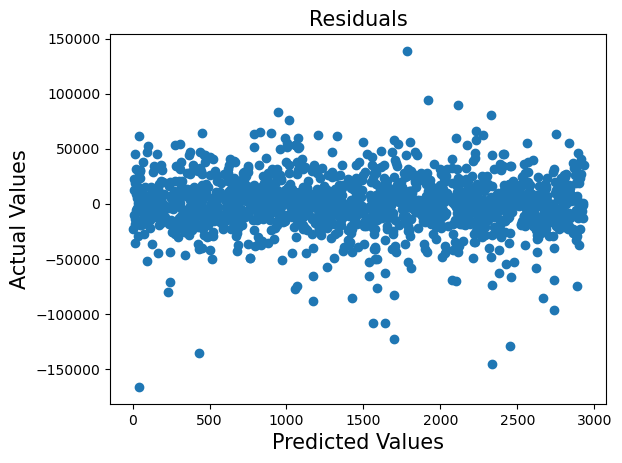

In [145]:
get_linear_regression(X=X_train_3, y=y_fin)

In [146]:
# Scale/Fit Model
ss = StandardScaler()
tra_train_3 = ss.fit_transform(X_train_3)
tra_test_3 = ss.transform(X_test_3)


In [147]:
lasso = LassoCV(n_alphas=200)
lasso.fit(tra_train_3, y_fin)

C:\Users\ianst\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1614: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LassoCV(n_alphas=200)

In [148]:
#RMSE Z-Train
mean_squared_error(y_true=y_fin, y_pred=lasso.predict(tra_train_3), squared=False)

24524.944700983644

In [149]:

# Predit Z-Test
sale_prediction_3 = lasso.predict(tra_test_3)
sale_prediction_3

array([138884.51031265, 176530.99455075, 190157.02483284, 115880.89788223,
       181132.40608226,  88334.50928595, 119422.66519194, 159790.06513764,
       194312.99663988, 167729.66618662, 156035.57414777, 130239.11075726,
       160750.55180528, 241153.88433944, 180360.05025341, 122520.66815351,
       126886.16206438, 125361.71478554, 202408.01830603, 173181.80145463,
       146539.55538983, 120873.09281517, 193244.17393058, 149216.93233987,
       192472.42345746, 121436.71900524, 116757.13084418, 147401.17587387,
       137611.01337769,  44310.78084618, 117009.66592138, 104302.30550786,
       227440.52956892, 137134.38592106, 228807.6024388 , 181794.16891034,
       119015.71872941,  92241.87289582, 103416.2033303 , 202879.69970405,
       157577.04413458, 207486.06500241, 153451.36216958, 173217.00293216,
       205848.61109798,  99392.29392197, 215769.71963441, 105880.22953465,
       134674.38404849, 120810.97101398, 108469.4235602 , 199223.20458925,
       247861.444139  , 1

In [150]:
# Adding 'SalePrice' Column to Test Dataset
test_df_3['SalePrice'] = sale_prediction_3

In [151]:
submission_3 = test_df_3[['SalePrice']].sort_values(by='Id')
submission_3.head()


,SalePrice
Id,
2,136732.936263
4,273363.523685
6,188853.993843
7,242613.878171
17,208262.593427


In [152]:
submission_3.shape

(878, 1)

In [153]:
# Submission 3 to .CSV
submission_3.to_csv('./datasets/submission_3.csv', index=True)

# Conclusion and Recommendations

## Conclusion

 - This statiscal analysis of the Ames Iowa Housing dataset showed lower RMSE scores when utilizing Linear and 
     Lasso regression.
 - The Lasso function imposed a constraint on the model parameters, eliminating features with a low or 0 
     coefficients.
 - The Root Mean Square Error(RMSE) was typically lower when comparing the LASSO regression model to the Linear regression model.  
 - The results showed that the LASSO regression outperformed the Ridge and Linear Regression functions.  This is due to the fact in the LASSO regression it shirnks values realtively low or close to 0 coefficients.
 - Starting from baseline, the RMSE decreased from model 1, 2, and 3 respectively.
 - Adding different features, a combination of numerical and categorical decreased the RMSE

## Recommendations

My recommendations based off my anaylsis of the Iowa Housing dataset for the Iowa Housing Company include:

Based on the run models there are 5 features that will be the most impactful towards sale price:

    - Overall material and quality of property
    - Ground Living Area
    - Total Basement Square Footage
    - Neighborhoods:StoneBr, NridgHt, NoRidge

When remodeling a home it is important that the overall material and quaility of the property is very good or excellent.
Furhermore, one should pay attention to specific neighborhoods specifically: Stone Brook, Northridge Heights, and 
Northrdige.  It is also important to make inspect the overall size of the living room and basement.

Lastly, two features produced negative coefficients which tells us that the worsening of these features, lowers
the sale price.  They are kitchen quality and exterior quality.  It is important the quality and condition of the 
kitchen and exterior quality is average or good.  

Overall for someone who is buying and selling a home, inspecting the listed features above will help ensure the
best saleprice. 